# **PROYECTO FINAL PROCESAMIENTO Y CLASIFICACIÓN DE DATOS**

***LESLYE MARISOL HERNÁNDEZ BOLAÑOS***

***1819111***

MAESTRÍA EN CIENCIA DE DATOS

MARZO 2025

##Librerías

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools



#Extrae los documentos del zip

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Análisis de imagenes/Brain Tumor Data Set.zip"  # Cambia esto por el nombre del archivo
extract_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Análisis de imagenes/"  # Opcional: cambia esto si quieres extraer en una ruta específica

#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
 #   zip_ref.extractall(extract_path)

print("Archivos extraídos en:", os.listdir(extract_path))


Archivos extraídos en: ['Brain Tumor Data Set.zip', 'Brain Tumor Data Set', 'Tarea 4 Análisis de Imagenes.ipynb', 'PROYECTO LMHB PCD']


In [ ]:
#Para ejemplos
from PIL import Image
from IPython.display import display

# Cargar la imagen TIFF
tiff_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing/glioma_tumor/image(1).jpg"
img = Image.open(tiff_path)

# Guardarla en formato PNG
png_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/glioma_tumor.png"
img.save(png_path, "PNG")

# Cargar la imagen TIFF
tiff_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing/meningioma_tumor/image(1).jpg"
img = Image.open(tiff_path)

# Guardarla en formato PNG
png_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/meningioma_tumor.png"
img.save(png_path, "PNG")

# Cargar la imagen TIFF
tiff_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing/pituitary_tumor/image(1).jpg"
img = Image.open(tiff_path)

# Guardarla en formato PNG
png_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/pituitary_tumor.png"
img.save(png_path, "PNG")



#**¿Qué es un tumor cerebral**

Un tumor cerebral es aquella presencia de masa de células que crece dentro del cerebro o cercano a este. Para
su correcta y oportuna detección es necesario la exploración física y neurológica, por medio de un examen clínico en
caso de que se presenten signos y síntomas en el paciente. La exploración básica incluye conocer aspectos como los
movimientos de los ojos, visión, oído, reflejos, coordinación y sentidos entre otros, también otra forma de detección
es por medio de pruebas radiológicas, estas son por medio de imágenes que ayuda a determinar el tamaño, la zona
afectada y el número de lesiones.


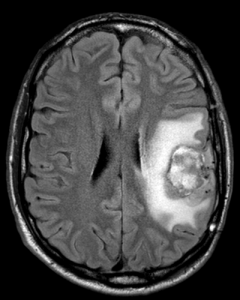

Estos tumores se pueden
clasificar en los siguientes tipos:

Cáncer primario: El cáncer cerebral primario se origina en el propio cerebro, mientras que el cáncer cerebral
secundario, o metástasis cerebral, se produce cuando células cancerosas de otras partes del cuerpo se propagan
al cerebro. Si bien los tumores cerebrales primarios son relativamente raros, los secundarios son más comunes
debido a la mayor prevalencia de cánceres que pueden hacer metástasis. Los tumores cerebrales primarios
pueden clasificarse en varios subtipos, entre ellos:



* Gliomas: Esta categoría abarca tumores que surgen de las células gliales, estas celulas ayudan a que el cerebro funcione de forma correcta, con subtipos como astrocitomas, que son aquellos tumores que nacen de las células llamadas astrocitos, que normalmente ayudan a proteger y alimentar a las neuronas, oligodendrogliomas, que son aquellos tumores que crecen a partir de otras células que envuelven las neuronas para que los impulsos eléctricos viajen rápido por el cerebro y el glioblastoma multiforme (GBM), que son tumores altamente agresivo, que es el tipo de astrocitoma más frecuente. Los gliomas representan una proporción significativa de los tumores cerebrales primario

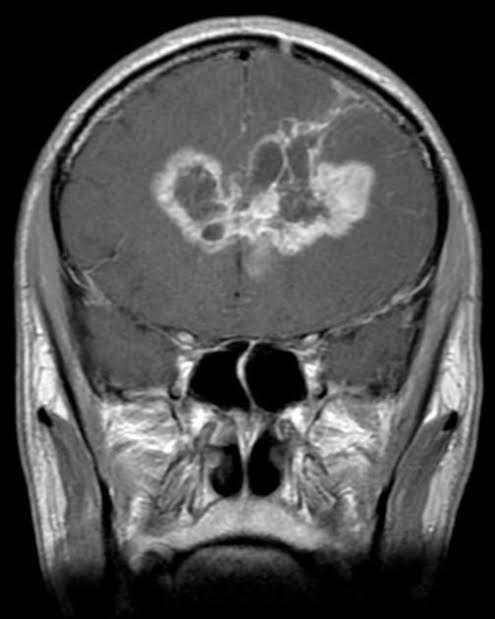


*   Meningiomas:
Estos tumores se desarrollan a partir de las meninges, las capas protectoras que rodean el cerebro y la médula espinal, y generalmente se consideran benignos.


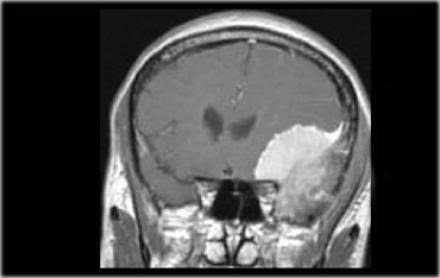

* Meduloblastomas: Los meduloblastomas, que se presentan con frecuencia en niños, son tumores malig-
nos que pueden propagarse a través del líquido cefalorraquídeo y requieren tratamiento inmediato.

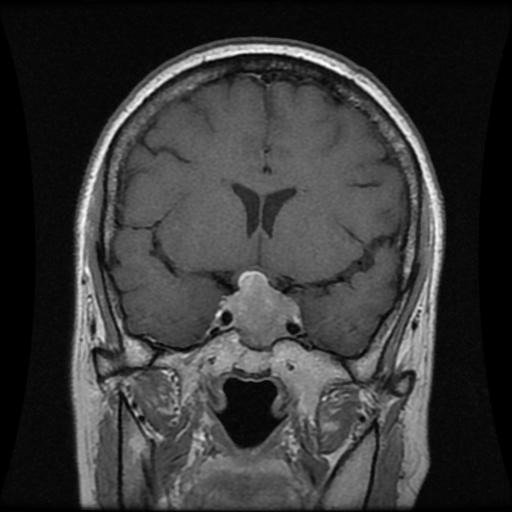

#Extraemos las imagenes

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df


In [ ]:
tv_df = train_df('/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Validation')
ts_df = test_df('/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing')
tr_df=train_df('/content/drive/MyDrive/Leslye/Escuela/MCD/PCD//PROYECTO FINAL/DATA_SET/Training')
#tr_df=train_df('/content/drive/MyDrive/Leslye/Escuela/MCD/PCD//PROYECTO FINAL/DATA_SET/Training')

In [ ]:
tr_df["Class"].unique()

array(['pituitary_tumor', 'no_tumor', 'meningioma_tumor', 'glioma_tumor'],
      dtype=object)

In [ ]:
#Corregimos nombres a español
tr_df.loc[tr_df["Class"]=='pituitary_tumor', 'Class']='tumor_meduloblastoma'
tr_df.loc[tr_df["Class"]=='no_tumor', 'Class']='sin_tumor'
tr_df.loc[tr_df["Class"]=='glioma_tumor', 'Class']='tumor_glioma'
tr_df.loc[tr_df["Class"]=='meningioma_tumor', 'Class']='tumor_meningioma'

ts_df.loc[ts_df["Class"]=='pituitary_tumor', 'Class']='tumor_meduloblastoma'
ts_df.loc[ts_df["Class"]=='no_tumor', 'Class']='sin_tumor'
ts_df.loc[ts_df["Class"]=='glioma_tumor', 'Class']='tumor_glioma'
ts_df.loc[ts_df["Class"]=='meningioma_tumor', 'Class']='tumor_meningioma'


tv_df.loc[tv_df["Class"]=='pituitary_tumor', 'Class']='tumor_meduloblastoma'
tv_df.loc[tv_df["Class"]=='no_tumor', 'Class']='sin_tumor'
tv_df.loc[tv_df["Class"]=='glioma_tumor', 'Class']='tumor_glioma'
tv_df.loc[tv_df["Class"]=='meningioma_tumor', 'Class']='tumor_meningioma'

#EXPLORACIÓN

El data set contiene imagenes que ya están preclasificadas por el tipo de

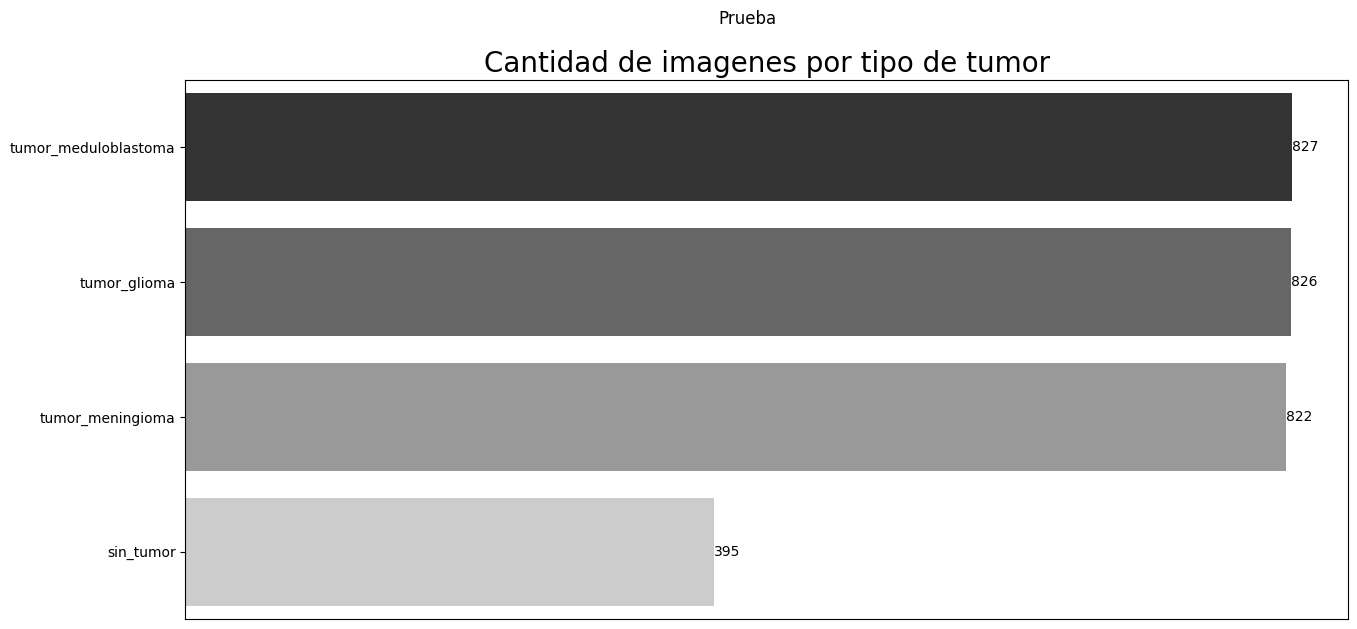

In [ ]:
# Imagenes de entrenamiento
plt.figure(figsize=(15,7))
ax = sns.countplot(y=tr_df['Class'], palette='gray',
order=tr_df["Class"].value_counts().index
)

plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de imagenes por tipo de tumor', fontsize=20)
#subtitulo
plt.suptitle('Prueba')

for container in ax.containers: #Añadimos el conteo
    ax.bar_label(container)


ax.set_xticks([])  # Oculta las marcas del eje X
ax.set_xlabel('')  # Borra el nombre del eje X


# Ruta donde se guardará el archivo
nombre='Histograma_prueba_total'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')

plt.show()


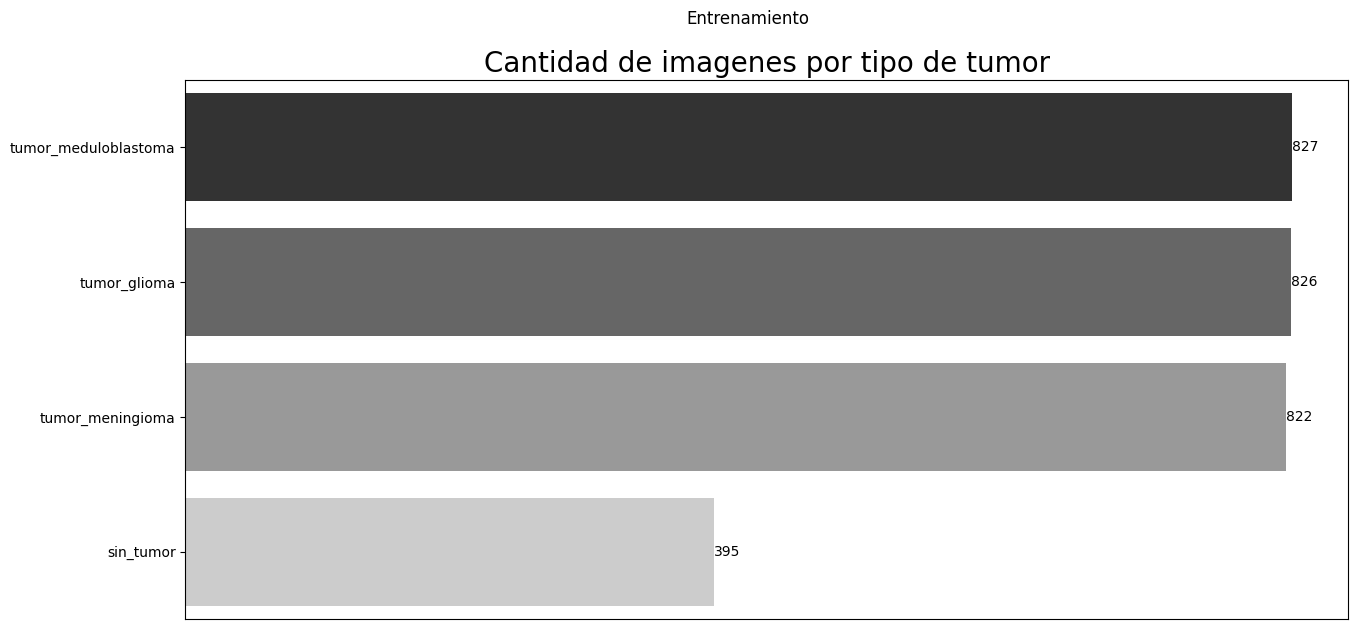

In [ ]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='gray',
 order=ts_df["Class"].value_counts().index
)

ax.set(xlabel='', ylabel='')
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de imagenes por tipo de tumor', fontsize=20)
#subtitulo
plt.suptitle('Entrenamiento')

for container in ax.containers: #Añadimos el conteo
    ax.bar_label(container)


ax.set_xticks([])  # Oculta las marcas del eje X
ax.set_xlabel('')  # Borra el nombre del eje X




# Ruta donde se guardará el archivo en tu Google Drive
nombre='Histograma_entrenamiento_total'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')

plt.show()

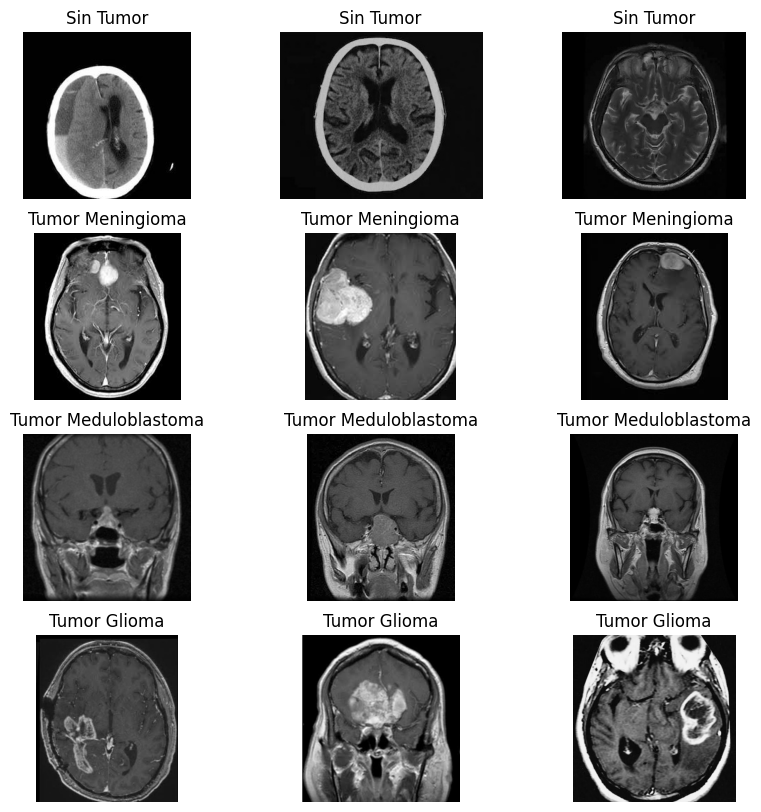

In [ ]:
# Image overview
#'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor
#3 de cada una
tr_df_ejemplo= tr_df[tr_df['Class']=='sin_tumor'].head(3)
tr_df_ejemplo=pd.concat((tr_df_ejemplo,tr_df[tr_df['Class']=='tumor_meningioma'].tail(3) ))
tr_df_ejemplo=pd.concat((tr_df_ejemplo,tr_df[tr_df['Class']=='tumor_meduloblastoma'].tail(3) ))
tr_df_ejemplo=pd.concat((tr_df_ejemplo,tr_df[tr_df['Class']=='tumor_glioma'].tail(3) ))
tr_df_ejemplo=tr_df_ejemplo.reset_index(drop=True)

def df_overview(images, labels):
    plt.figure(figsize=(10, 10))
    batch_size = 12
    labels=labels.str.replace('_' , ' ')
    labels=labels.str.title()
    for i in range(batch_size):
        ax = plt.subplot(4, 3, i + 1)
        img = Image.open(images[i])
        plt.imshow(img)

        plt.title(labels[i])
        plt.axis('off')
       # plt.gca().set_aspect('equal')
       # Ruta donde se guardará el archivo en tu Google Drive
    nombre='Muestra_tipos_tumores'
    ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
    plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
    plt.show()

df_overview(tr_df_ejemplo['Class Path'], tr_df_ejemplo['Class'])



Tamaño

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def df_overview_bw(images, labels, threshold=128):
    plt.figure(figsize=(10, 10))
    batch_size = 12
    labels = labels.str.replace('_', ' ')
    labels = labels.str.title()

    for i in range(batch_size):
        ax = plt.subplot(4, 3, i + 1)

        # Convertir imagen a escala de grises
        img = Image.open(images[i]).convert("L")

        # Aplicar umbral para hacerlo blanco y negro puro
        img = np.array(img)  # Convertir a array NumPy
        img = (img > threshold) * 255  # Si es mayor al umbral, blanco (255), si no, negro (0)

        plt.imshow(img, cmap="gray", vmin=0, vmax=255)
        plt.title(labels[i])
        plt.axis('off')


    # Ruta donde se guardará el archivo en tu Google Drive
    nombre='Muestra_tipo_tumores_blancoYnegro'
    ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
    plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
    plt.show()



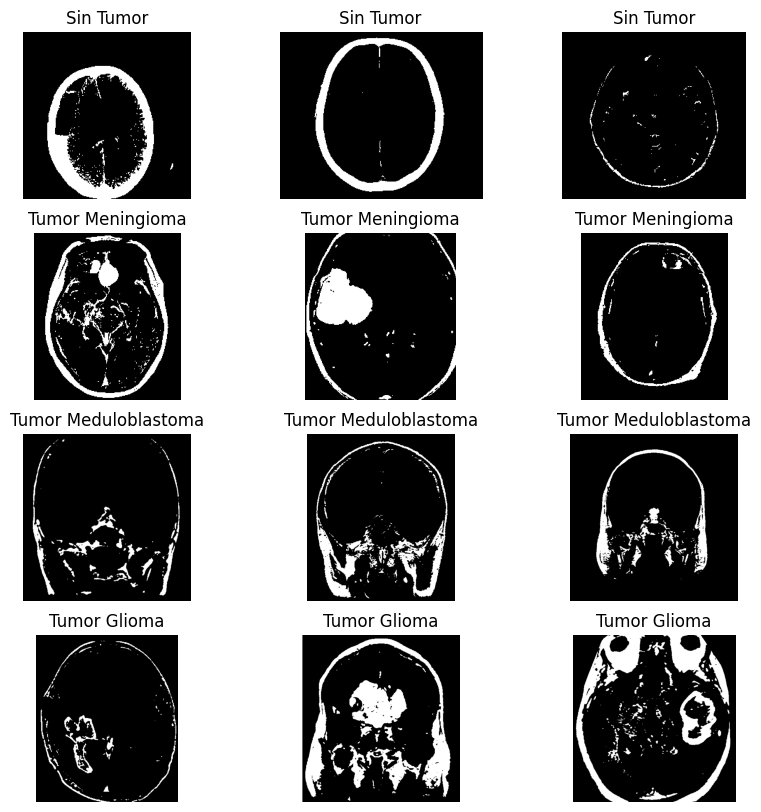

In [ ]:
df_overview_bw(tr_df_ejemplo['Class Path'], tr_df_ejemplo['Class'])

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image

def df_convex_hull(df, image_col, title_col, threshold=128):
    plt.figure(figsize=(10, 10))
    batch_size = min(len(df), 12)  # Máximo 12 imágenes por visualización

    for i in range(batch_size):
        ax = plt.subplot(4, 3, i + 1)

        # Cargar la imagen en escala de grises
        img = Image.open(df[image_col].iloc[i]).convert("L")

        # Convertir a binario (blanco y negro puro)
        img_array = np.array(img)
        binary_img = img_array > threshold  # Umbralización

        # Aplicar envolvente convexa
        convex_hull = convex_hull_image(binary_img)

        # Mostrar imagen con convex hull
        plt.imshow(convex_hull, cmap="gray")
        df['title_col2'] =df[title_col].str.replace('_', ' ')
        df['title_col2'] = df['title_col2'].str.title()
        plt.title(df['title_col2'].iloc[i])
        plt.axis("off")

    plt.show()



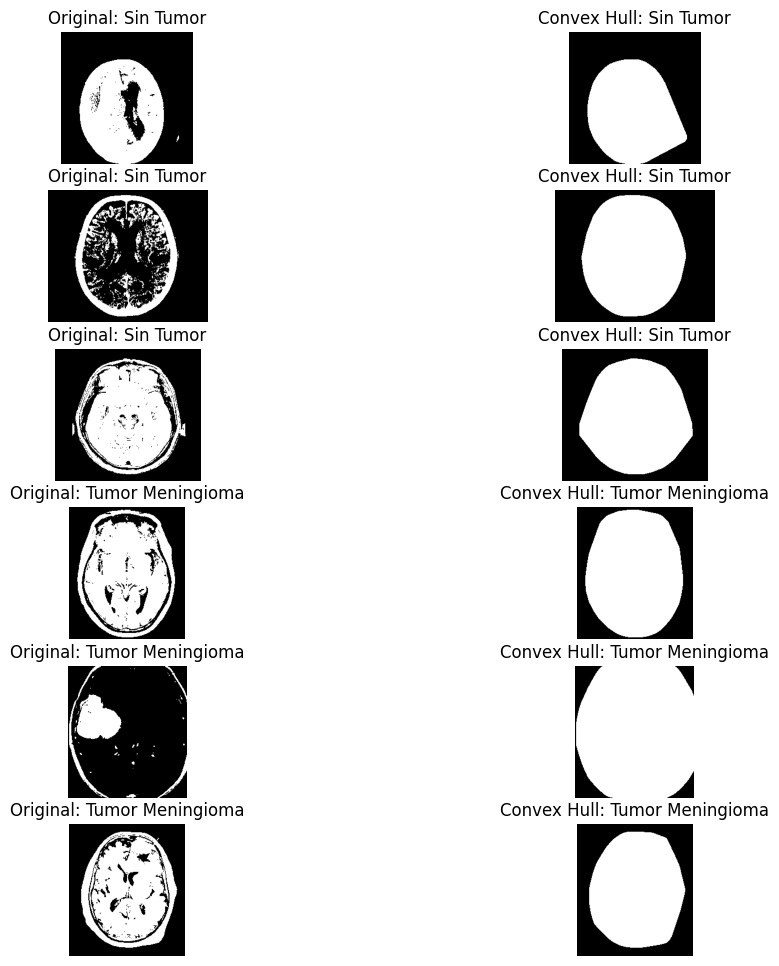

In [ ]:

df_convex_hull(tr_df_ejemplo
, "Class Path", "Class")

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage.filters import threshold_otsu  # Umbral automático

def df_convex_hull(df, image_col, title_col):
    plt.figure(figsize=(12, 12))
    batch_size = min(len(df), 6)  # Máximo 6 imágenes para buena visualización

    for i in range(batch_size):
        ax = plt.subplot(batch_size, 2, 2*i + 1)

        # Cargar imagen en escala de grises
        img = Image.open(df[image_col].iloc[i]).convert("L")
        img_array = np.array(img)

        # Aplicar umbral automático de Otsu para mejor binarización
        threshold = threshold_otsu(img_array)
        binary_img = img_array > threshold

        # Aplicar Convex Hull
        convex_hull = convex_hull_image(binary_img)

        # Mostrar imagen original
        plt.imshow(binary_img, cmap="gray")
        df['title_col2'] =df[title_col].str.replace('_', ' ')
        df['title_col2'] = df['title_col2'].str.title()
        plt.title(f"Original: {df['title_col2'].iloc[i]}")
        plt.axis("off")

        # Mostrar Convex Hull
        ax = plt.subplot(batch_size, 2, 2*i + 2)
        plt.imshow(convex_hull, cmap="gray")

        plt.title(f"Convex Hull: {df['title_col2'].iloc[i]}")
        #plt.title(f"Convex Hull: {df[title_col].iloc[i]}")
        plt.axis("off")


    # Ruta donde se guardará el archivo en tu Google Drive
    nombre='Ejemplo_usando_convex_hull_image'
    ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
    plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
    plt.show()


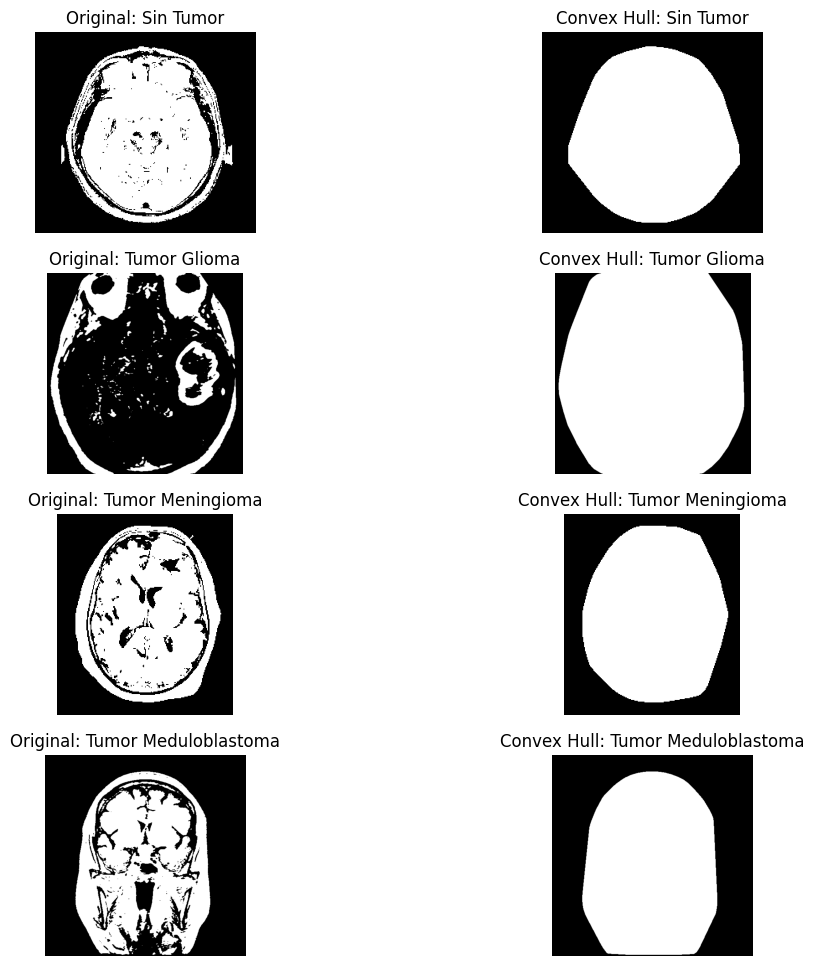

In [ ]:

df_convex_hull(pd.concat((tr_df_ejemplo[2:3], tr_df_ejemplo[11:12],tr_df_ejemplo[5:6], tr_df_ejemplo[8:9], tr_df_ejemplo[10:10]))
, "Class Path", "Class")


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

def detect_inner_convex(df, image_col, title_col):
    plt.figure(figsize=(2, 4))
    batch_size = min(len(df), 4)  # Máximo 6 imágenes para buena visualización

    for i in range(batch_size):
        ax = plt.subplot(batch_size, 2, 2*i + 1)

        # Cargar imagen en escala de grises
        img = Image.open(df[image_col].iloc[i]).convert("L")
        img_array = np.array(img)

        # Binarización con umbral automático
        threshold = threshold_otsu(img_array)
        binary_img = img_array > threshold

        # Detectar regiones y convex hulls
        labeled_img = label(binary_img)
        regions = regionprops(labeled_img)

        # Crear una imagen de resultado
        convex_mask = np.zeros_like(binary_img, dtype=np.uint8)

        # Encontrar el contorno más grande (externo) y los internos
        areas = [r.area for r in regions]
        max_area = max(areas) if areas else 0

        for region in regions:
            hull = convex_hull_image(region.image)  # Convex Hull de la región

            # Si es el más grande → Color 1 (Blanco)
            if region.area == max_area:
                convex_mask[labeled_img == region.label] = 255
                convex_mask_rgb = np.zeros((*convex_mask.shape, 3), dtype=np.uint8)

                # Si es más pequeño → Color rojo (255, 0, 0)
                convex_mask_rgb[labeled_img == region.label] = [255, 0, 0]


            else:
                # Si es más pequeño → Color 2 (Morado)
                convex_mask[labeled_img == region.label] = 128

        # Mostrar imagen con convex hulls detectados
        plt.imshow(convex_mask, cmap="gray")

        df['title_col2'] =df[title_col].str.replace('_', ' ')
        df['title_col2'] = df['title_col2'].str.title()
        plt.title(f"Convex Hulls: {df['title_col2'].iloc[i]}", fontsize=7)
        plt.axis("off")


    # Ruta donde se guardará el archivo en tu Google Drive
    nombre='Ejemplo_usando_convex_hull_image_coloreado'
    ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
    plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
    plt.show()


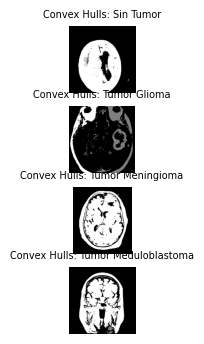

In [ ]:
detect_inner_convex(pd.concat((tr_df_ejemplo[0:1], tr_df_ejemplo[11:12],tr_df_ejemplo[5:6], tr_df_ejemplo[8:9], tr_df_ejemplo[10:10])) ,
"Class Path", "Class")

### Recortamos la imagen

In [ ]:
import cv2
import pandas as pd
import numpy as np
import os

def process_and_save_image(image_path, category, save_dir="recortadas"):
    # Crear la carpeta si no existe
    os.makedirs(save_dir, exist_ok=True)

    # Cargar la imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error al cargar la imagen: {image_path}")
        return

    # Aplicar umbral para binarizar la imagen
    _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Encontrar contornos
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print(f"No se encontraron contornos en {image_path}")
        return

    # Encontrar el contorno más grande
    largest_contour = max(contours, key=cv2.contourArea)

    # Encontrar puntos extremos (caja delimitadora)
    x_min, y_min, w, h = cv2.boundingRect(largest_contour)
    x_max, y_max = x_min + w, y_min + h

    # Recortar la imagen
    cropped_img = img[y_min:y_max, x_min:x_max]

    # Guardar la imagen recortada
    output_path = os.path.join(save_dir, f"{category}_{os.path.basename(image_path)}")
    #cv2.imwrite(output_path, cropped_img)
    print(f"Imagen guardada en: {output_path}")





In [ ]:
tr_df['Class'].unique()

array(['sin_tumor', 'tumor_glioma', 'tumor_meningioma',
       'tumor_meduloblastoma'], dtype=object)

In [ ]:
 example=tr_df[tr_df['Class']=='sin_tumor']
 example

Class Path      Class
0    /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor
1    /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor
2    /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor
3    /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor
4    /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor
..                                                 ...        ...
100  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor
101  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor
102  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor
103  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor
104  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  sin_tumor

[105 rows x 2 columns]

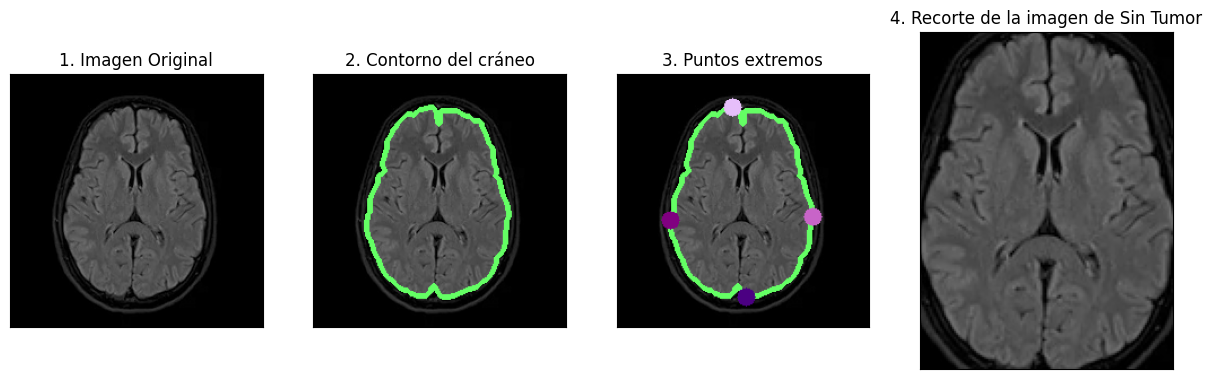

In [ ]:
IMG_SIZE = (224,224)

i=3
img = cv2.imread( example.loc[i, 'Class Path'] )
img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (100, 255, 100) , 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (128, 0, 128), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8,(200, 100, 200), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (230, 190, 250), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (75, 0, 130), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('1. Imagen Original')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('2. Contorno del cráneo')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('3. Puntos extremos')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
tipo=example.loc[i, 'Class'].replace('_', ' ').title()
plt.title('4. Recorte de la imagen de ' + tipo)
# Ruta donde se guardará el archivo en tu Google Drive
nombre='Recorte_por_pasos_'+example.loc[i, 'Class']
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
#Hacer lo mismo para todas las imagenes:
IMG_SIZE = (224,224)

import cv2
import pandas as pd
import numpy as np
import os
# Crear la carpeta si no existe
#os.makedirs('recortadas', exist_ok=True)

def process_and_save_image(image_path, category, tipo , save_dir="recortadas"):

    # Cargar la imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Removemos partes negras por fuera de superficie
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    #Encontrar contornos
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # Puntos extremos
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # contorno
    img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

    # add extreme points
    img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
    img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
    img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
    img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

    # crop
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    new_path=f"{category}_{os.path.basename(image_path)}"
    new_path=tipo+'_'+new_path
    # Guardar la imagen recortada
    output_path = os.path.join(save_dir,new_path )
    cv2.imwrite(output_path, new_img)
    return output_path #print(f"Imagen guardada en: {output_path}")












In [ ]:
# Procesar todas las imágenes del DataFrame
i=0
tr_df['Path crop']=''
for _, row in tr_df.iterrows():
  tr_df['Path crop'][i]=process_and_save_image(row["Class Path"], row["Class"], 'train')
  i=i+1

# Procesar todas las imágenes del DataFrame
i=0
ts_df['Path crop']=''
for _, row in ts_df.iterrows():
  ts_df['Path crop'][i]=process_and_save_image(row["Class Path"], row["Class"], 'test')
  i=i+1

## Modelo 1.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Definir el modelo CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(tr_gen.class_indices), activation='softmax')  # Número de clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(tr_gen,
                    validation_data=valid_gen,
                    epochs=20,
                    batch_size=batch_size)

# Evaluar en test
test_loss, test_acc = model.evaluate(ts_gen)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 233s 18s/step - accuracy: 0.2676 - loss: 4.0516 - val_accuracy: 0.3415 - val_loss: 1.3776
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 173s 14s/step - accuracy: 0.3857 - loss: 1.3019 - val_accuracy: 0.3192 - val_loss: 1.3606
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 176s 14s/step - accuracy: 0.5466 - loss: 1.1038 - val_accuracy: 0.3554 - val_loss: 1.3376
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 173s 14s/step - accuracy: 0.6712 - loss: 0.9120 - val_accuracy: 0.3861 - val_loss: 1.3048
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 174s 14s/step - accuracy: 0.7186 - loss: 0.7087 - val_accuracy: 0.3937 - val_loss: 1.3286
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 187s 15s/step - accuracy: 0.8094 - loss: 0.5223 - val_accuracy: 0.4341 - val_loss: 1.3970
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 175s 14s/step - accuracy: 0.8532 - loss: 0.4076 - val_accuracy: 0.4286 - val_loss: 1.5038
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 172s 14s/step - accuracy: 0.8700 - loss: 0.3691 - val_accuracy: 0.

## Modelo 2

In [ ]:
#10_08
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Modelo 2: CNN con regularización L2, Dropout y ajuste de Learning Rate
model_v2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='valid', activation='relu',
                  input_shape=(299, 299, 3), kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), padding='valid', activation='relu',
                  kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(128, (3, 3), padding='valid', activation='relu',
                  kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.6),
    layers.Dense(len(tr_gen.class_indices), activation='softmax')  # Número de clases
])

# Compilación
initial_lr = 0.0005
optimizer = keras.optimizers.Adam(learning_rate=initial_lr)

model_v2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

# Entrenamiento de Modelos
history_v2 = model_v2.fit(tr_gen, validation_data=valid_gen, epochs=50, batch_size=batch_size, callbacks=[lr_scheduler, early_stopping])

test_loss_v2, test_acc_v2 = model_v2.evaluate(ts_gen)

print(f"Modelo V2 - Test Accuracy: {test_acc_v2:.4f}")



Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 185s 15s/step - accuracy: 0.2435 - loss: 5.3743 - val_accuracy: 0.2955 - val_loss: 1.7974 - learning_rate: 5.0000e-04
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 15s/step - accuracy: 0.3599 - loss: 1.7850 - val_accuracy: 0.2878 - val_loss: 1.8132 - learning_rate: 5.0000e-04
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 15s/step - accuracy: 0.3011 - loss: 1.7932 - val_accuracy: 0.2976 - val_loss: 1.7986 - learning_rate: 5.0000e-04
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 180s 15s/step - accuracy: 0.3684 - loss: 1.7469 - val_accuracy: 0.1944 - val_loss: 1.7878 - learning_rate: 5.0000e-04
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 15s/step - accuracy: 0.4006 - loss: 1.7075 - val_accuracy: 0.3317 - val_loss: 1.7597 - learning_rate: 5.0000e-04
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 182s 15s/step - accuracy: 0.3548 - loss: 1.6943 - val_accuracy: 0.3150 - val_loss: 1.7360 - learning_rate: 5.0000e-04
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 15s/step - accuracy: 

In [ ]:
model.save("modelo_cnn.h5")  # Guardar
model_v2.save("modelo_cnn_v2.h5")  # Guarda el modelo

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo previamente guardado
model = load_model("modelo_cnn.h5")
model = load_model("modelo_cnn_v2.h5")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'modelo_cnn.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 297, 297, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 156800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      20,070,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,492,878 (230.76 MB)

 Trainable params: 20,164,292 (76.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,328,586 (153.84 MB)

In [ ]:
model_v2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 297, 297, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 156800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      20,070,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,492,878 (230.76 MB)

 Trainable params: 20,164,292 (76.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,328,586 (153.84 MB)

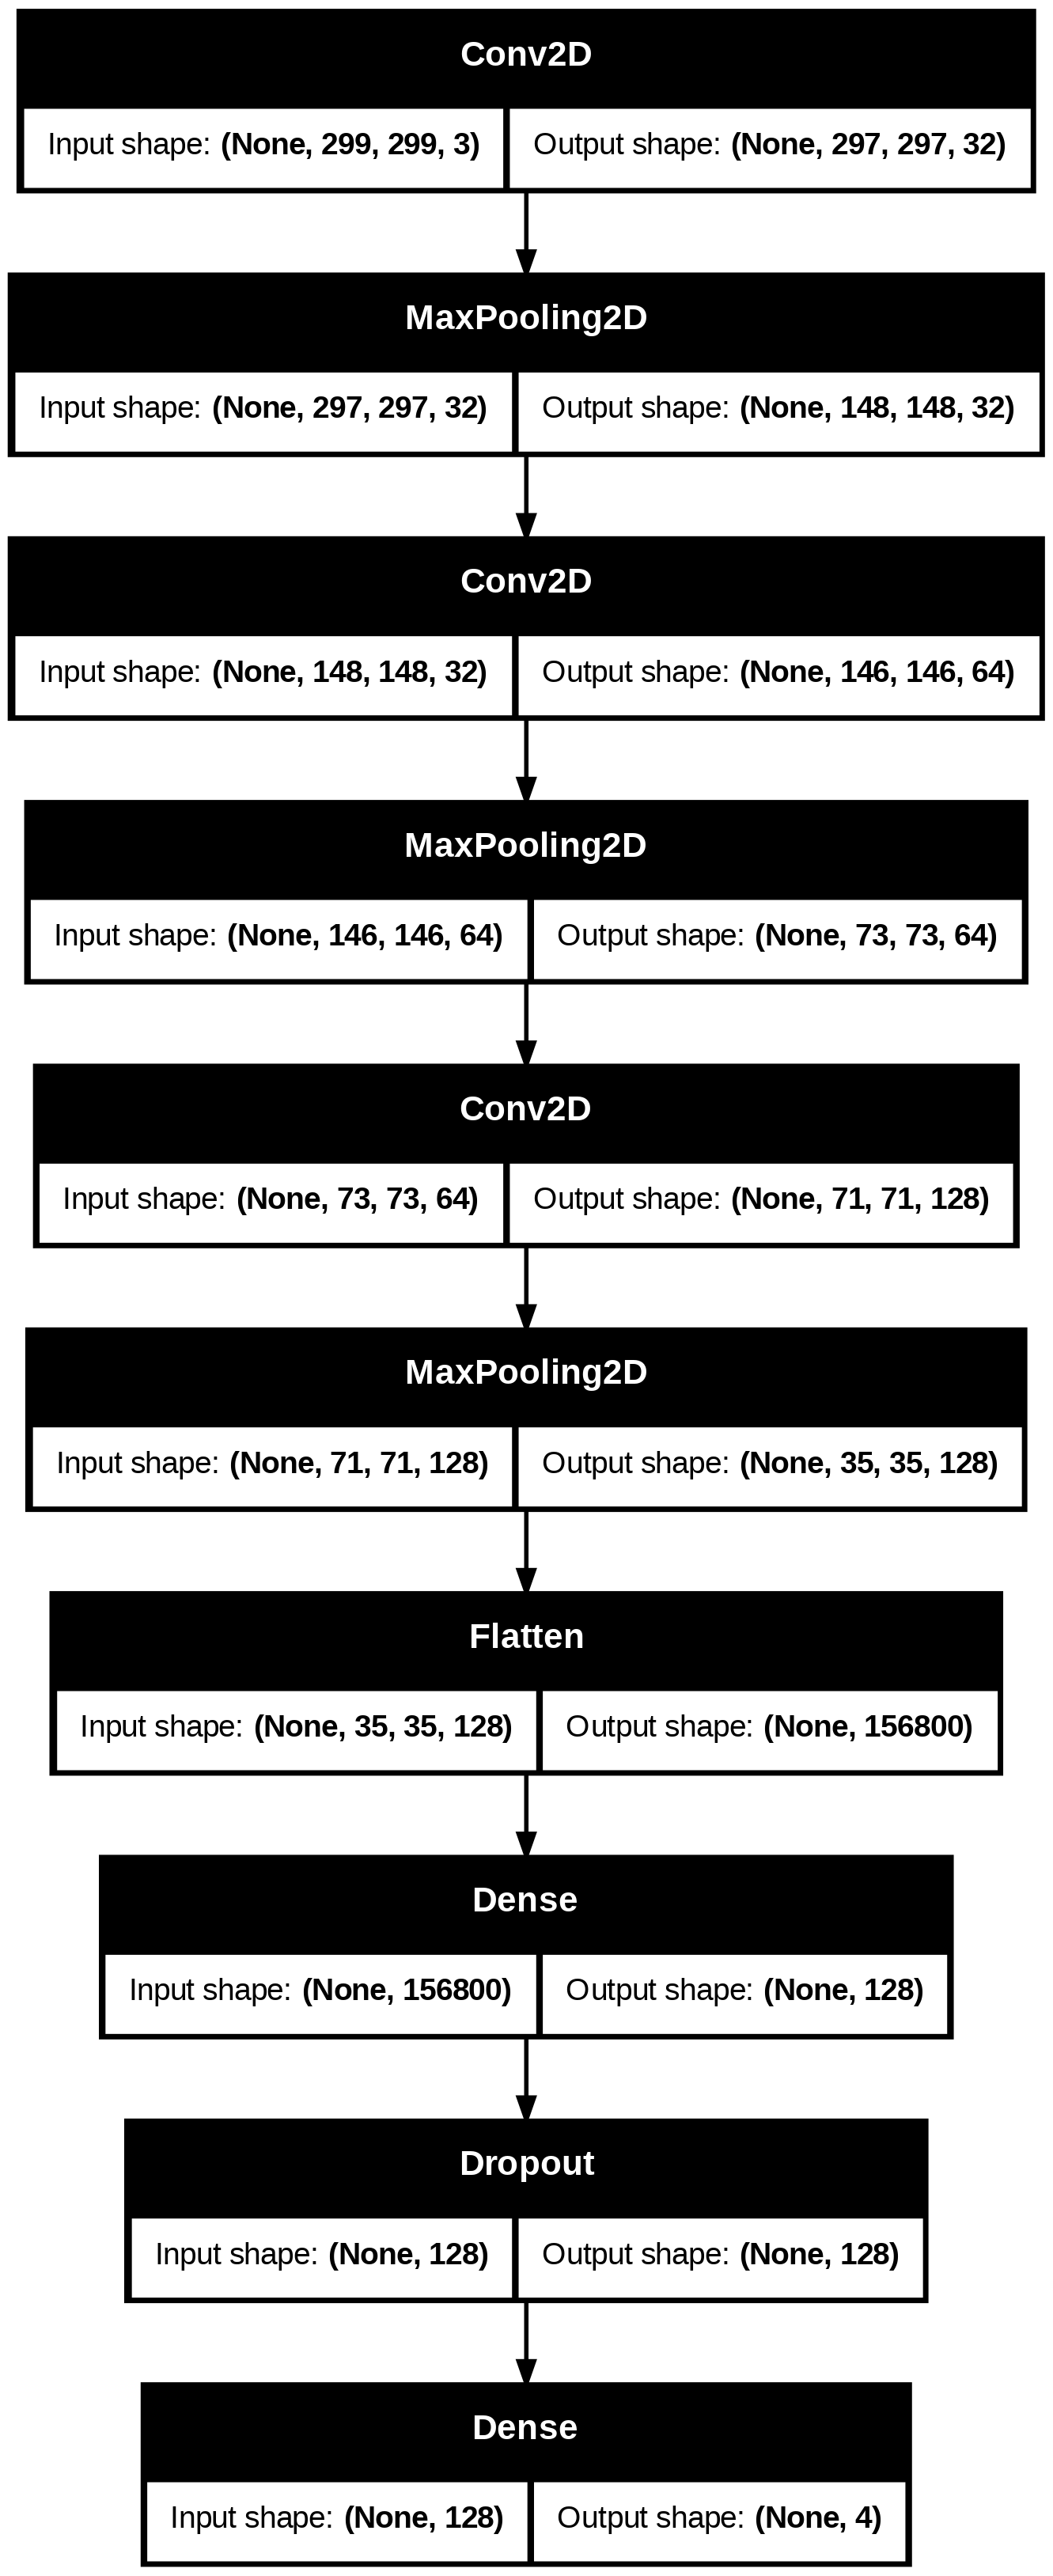

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Validacion y evaluación

In [ ]:
history.history.keys()

NameError: name 'history' is not defined

In [ ]:
def plot_metrics(history, modelo):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Pérdida')
    plt.plot(val_loss, label='Validación de Pérdida')
    plt.title('Pérdida')
    plt.legend()
    # Ruta donde se guardará el archivo
    nombre='Funciones_perdida_'+modelo
    ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
    plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Precisión de Entrenamiento')
    plt.plot(val_acc, label='Precisión en Validación')
    plt.title('Precision')
    plt.legend()
    # Ruta donde se guardará el archivo
    nombre='Funciones_precision_'+modelo
    ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
    plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')

    plt.show()

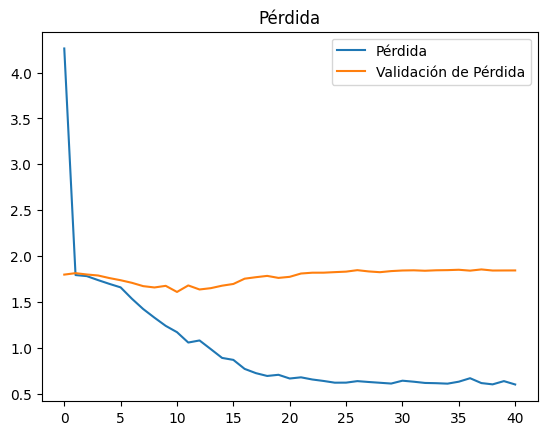

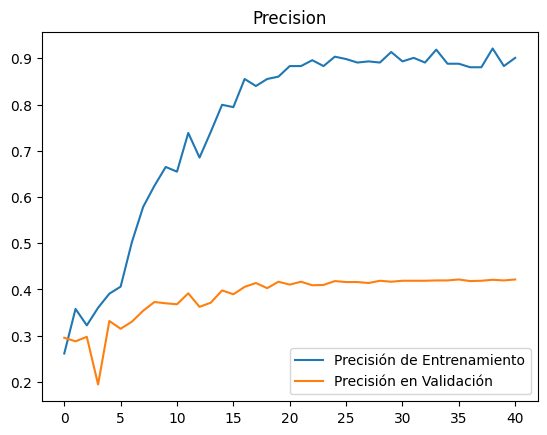

In [ ]:
plot_metrics(history_v2.history, 'modelo_v2')

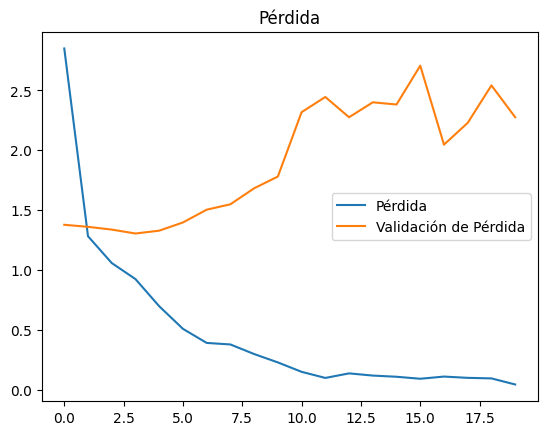

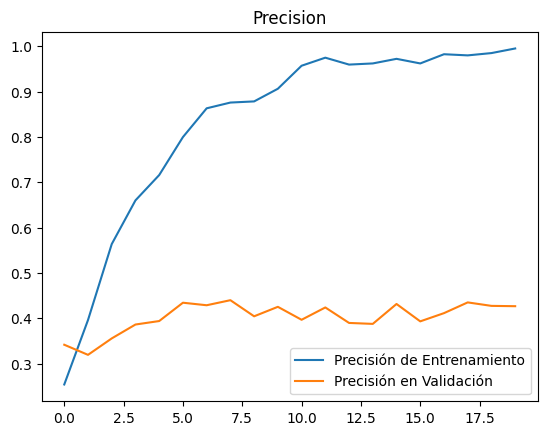

In [ ]:
plot_metrics(history.history, 'modelo1')

In [ ]:
#Guradamos historial
import pickle

history_dict = {
    "modelo_v1": history.history,
    "modelo_v2": history_v2.history
}

with open("historiales_entrenamiento.pkl", "wb") as f:
    pickle.dump(history_dict, f)


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(ts_gen)
print(f"\n Test Accuracy: {test_acc:.4f}")


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss_2, test_acc_2 = model_v2.evaluate(ts_gen)
print(f"\n Test Accuracy: {test_acc_2:.4f}")


NameError: name 'model_v2' is not defined

In [ ]:
history_v2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

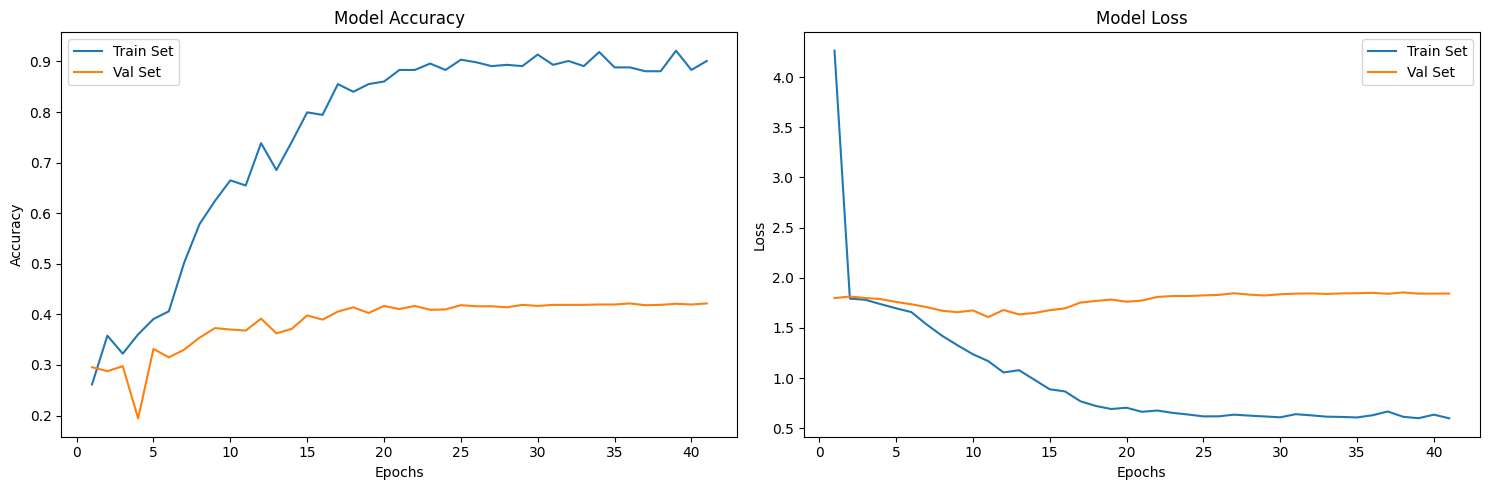

In [ ]:
# plot model performance
acc = history_v2.history['accuracy']
val_acc = history_v2.history['val_accuracy']
loss = history_v2.history['loss']
val_loss = history_v2.history['val_loss']
epochs_range = range(1, len(history_v2.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## Predicciones

90/90 ━━━━━━━━━━━━━━━━━━━━ 88s 979ms/step


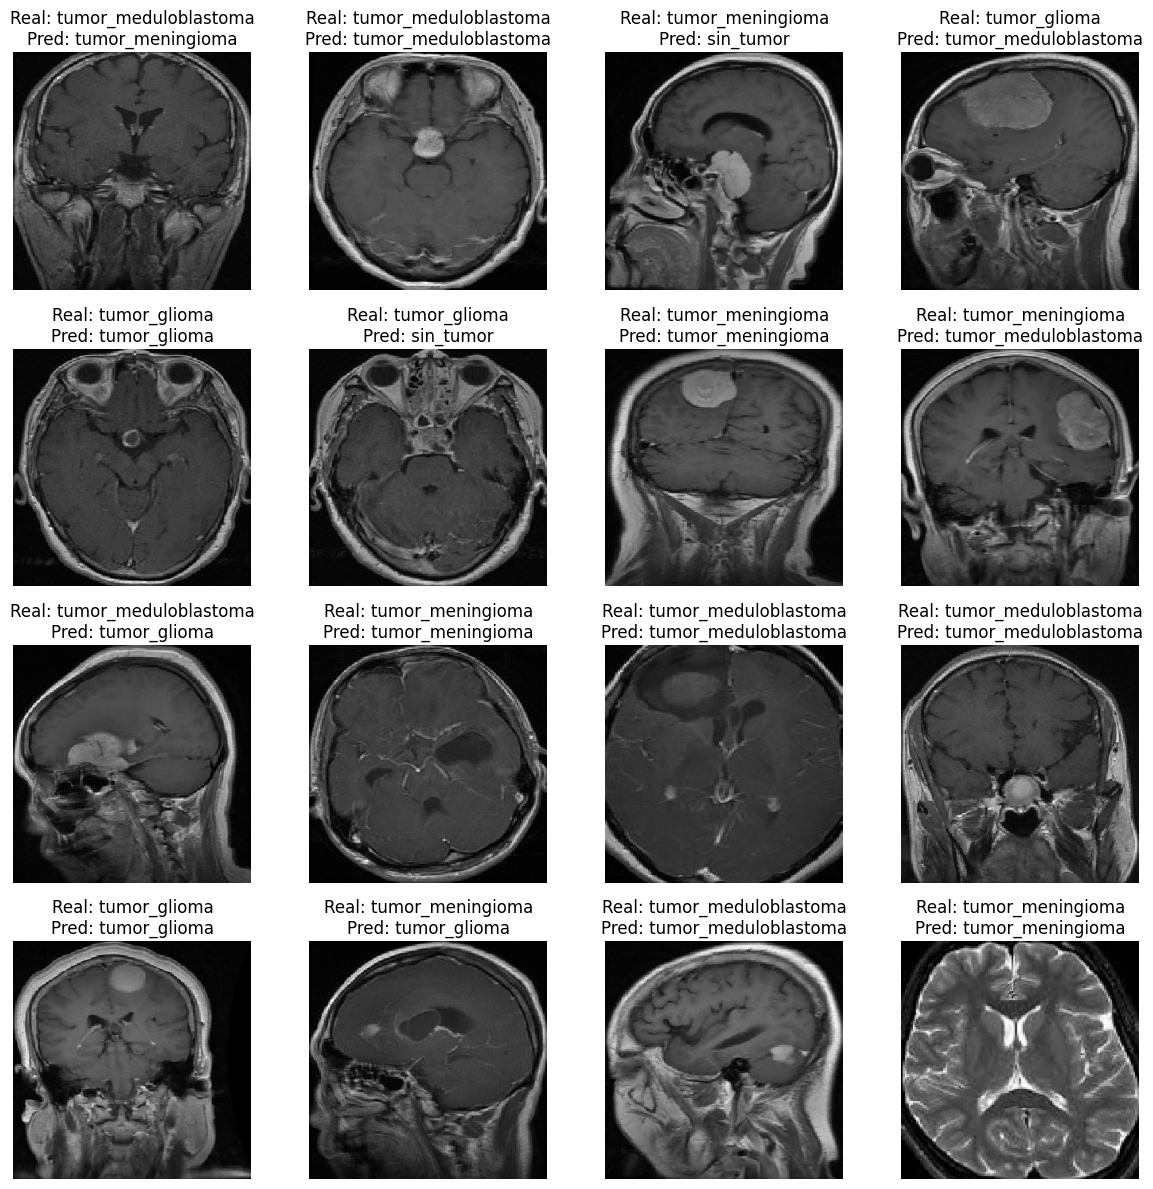

In [ ]:
import numpy as np

# Obtener predicciones del modelo
preds = model.predict(ts_gen)
pred_classes = np.argmax(preds, axis=1)  # Convertir a clases

# Obtener los nombres de las clases reales y predichas
true_classes = ts_gen.classes
class_labels = list(ts_gen.class_indices.keys())

# Mostrar algunas predicciones
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Grid de imágenes
for i, ax in enumerate(axes.flat):
    img, true_label = ts_gen[i][0][0], true_classes[i]  # Imagen y etiqueta real
    pred_label = pred_classes[i]  # Etiqueta predicha

    ax.imshow(img)
    ax.set_title(f"Real: {class_labels[true_label]}\nPred: {class_labels[pred_label]}")
    ax.axis("off")

plt.tight_layout()
# Ruta donde se guardará el archivo en tu Google Drive
nombre='Modelo1'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
plt.show()


90/90 ━━━━━━━━━━━━━━━━━━━━ 88s 976ms/step


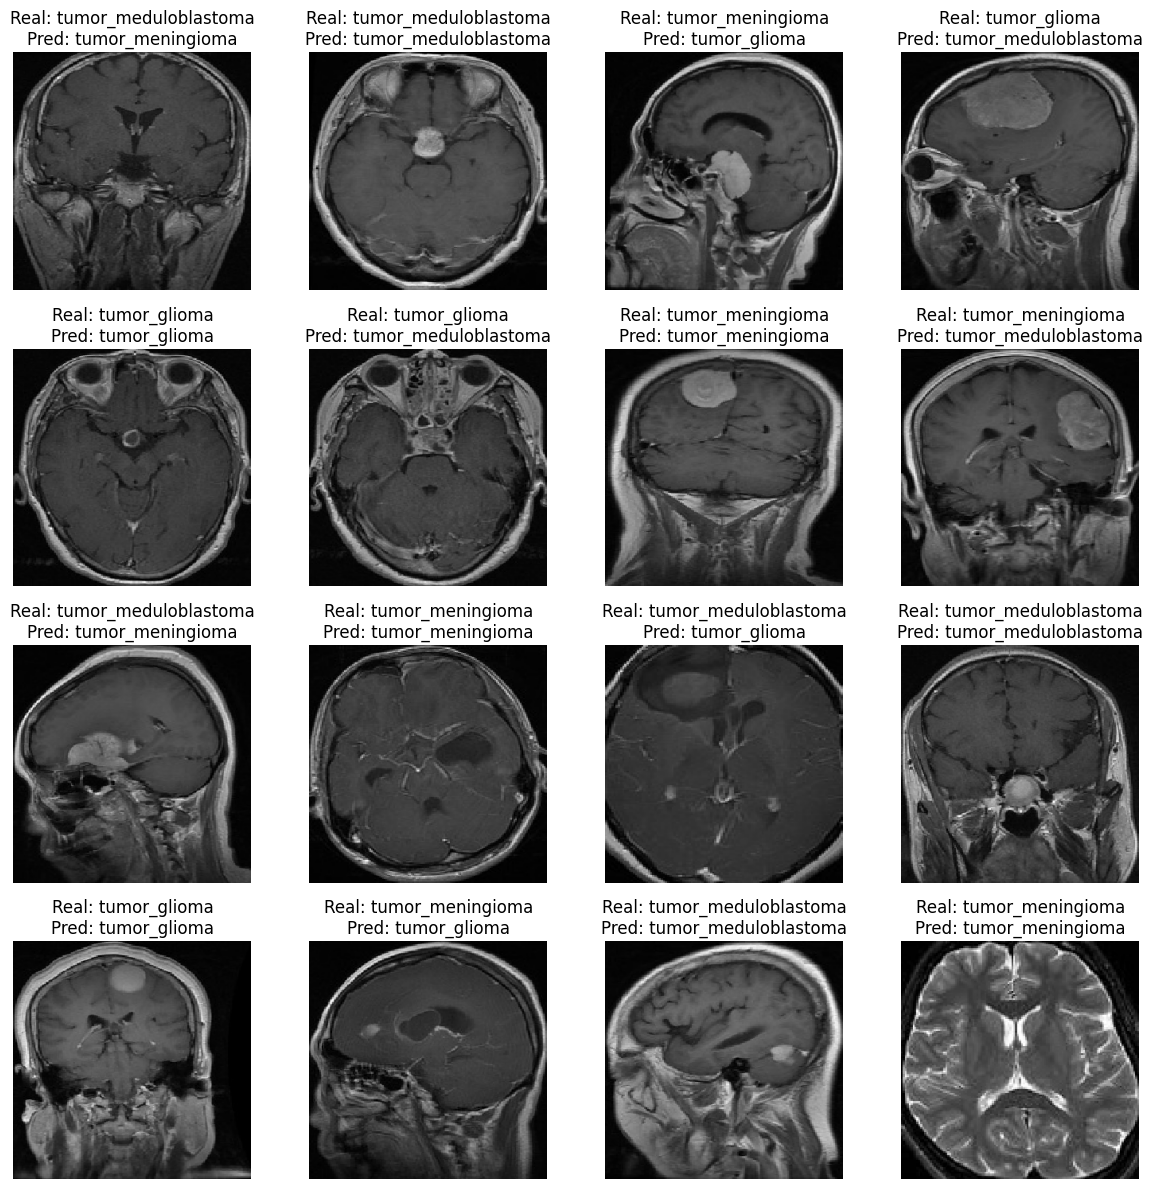

In [ ]:
import numpy as np

# Obtener predicciones del modelo
preds = model_v2.predict(ts_gen)
pred_classes = np.argmax(preds, axis=1)  # Convertir a clases

# Obtener los nombres de las clases reales y predichas
true_classes = ts_gen.classes
class_labels = list(ts_gen.class_indices.keys())

# Mostrar algunas predicciones
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Grid de imágenes
for i, ax in enumerate(axes.flat):
    img, true_label = ts_gen[i][0][0], true_classes[i]  # Imagen y etiqueta real
    pred_label = pred_classes[i]  # Etiqueta predicha

    ax.imshow(img)
    ax.set_title(f"Real: {class_labels[true_label]}\nPred: {class_labels[pred_label]}")
    ax.axis("off")

plt.tight_layout()
# Ruta donde se guardará el archivo en tu Google Drive
nombre='Modelo2'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
plt.show()

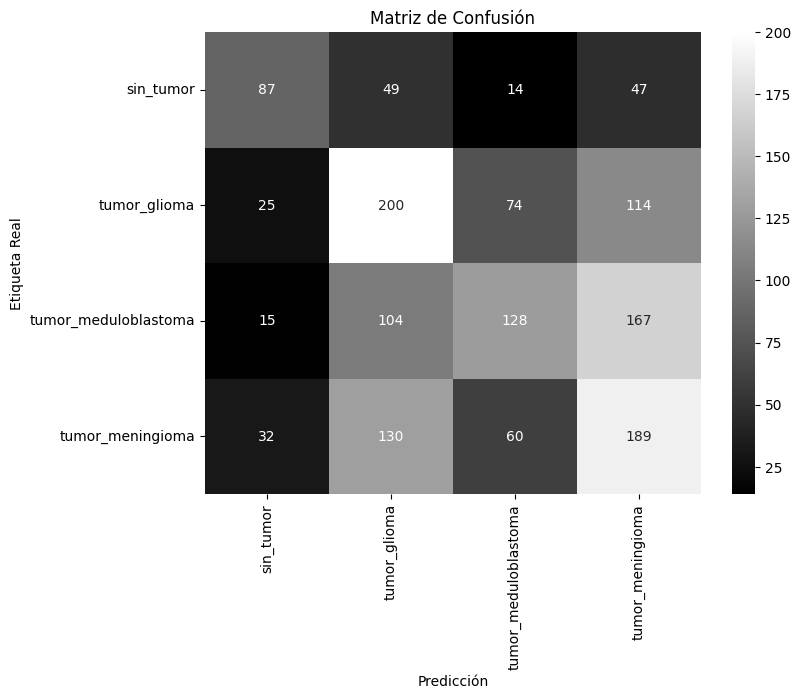

In [ ]:
import numpy aetrics import confusion_matrix
import seaborns np
from sklearn.m as sns
import matplotlib.pyplot as plt

# Obtener predicciones del modelo
y_pred_probs = model.predict(ts_gen)  # Probabilidades de cada clase
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir a etiquetas de clase

# Obtener etiquetas reales
y_true = ts_gen.classes
# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="gray", xticklabels=ts_gen.class_indices.keys(), yticklabels=ts_gen.class_indices.keys())
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
# Ruta donde se guardará el archivo en tu Google Drive
nombre='matriz_confusion_modelo1'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')

plt.show()


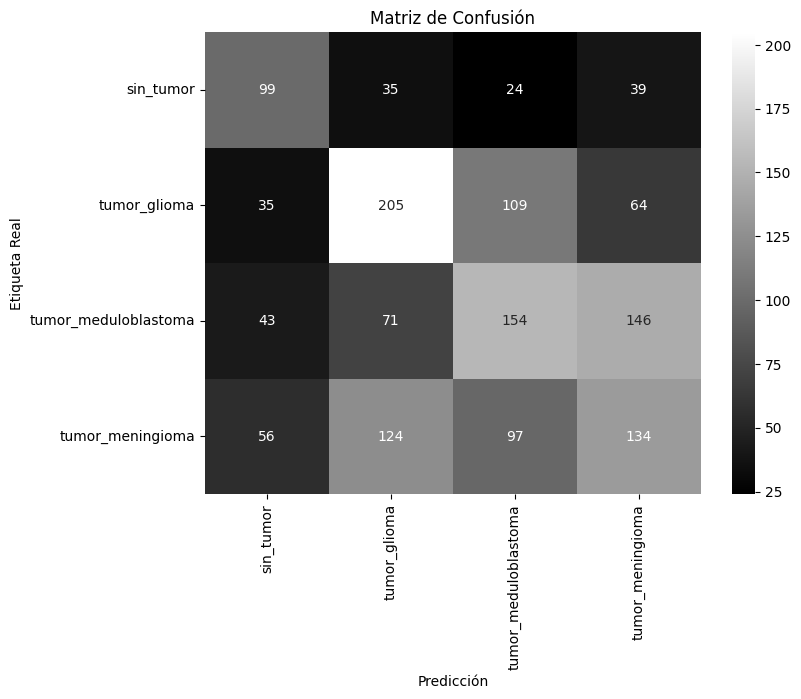

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener predicciones del modelo
y_pred_probs_2 = model_v2.predict(ts_gen)  # Probabilidades de cada clase
y_pred_2 = np.argmax(y_pred_probs_2, axis=1)  # Convertir a etiquetas de clase

# Obtener etiquetas reales
y_true_2 = ts_gen.classes
# Crear matriz de confusión
cm = confusion_matrix(y_true_2, y_pred_2)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="gray", xticklabels=ts_gen.class_indices.keys(), yticklabels=ts_gen.class_indices.keys())
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
# Ruta donde se guardará el archivo en tu Google Drive
nombre='matriz_confusion_modelo2'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')

plt.show()

##Modelo 3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd
import os





#  Aumento de datos con menor complejidad
_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


# Definir tamaño de las imágenes y tamaño del lote
img_size = (224, 224)  # Tamaño de las imágenes (puede cambiar según tus necesidades)
batch_size = 32  # Ajusta este valor según tu configuración

# Generador para entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)
tr_gen = train_datagen.flow_from_directory(
    tr_images_dir,  # Ruta a la carpeta de entrenamiento
    target_size=img_size,    # Redimensionar las imágenes
    batch_size=batch_size,   # Tamaño del lote
    class_mode='categorical' # O 'binary' dependiendo del número de clases
)

# Generador para prueba
test_datagen = ImageDataGenerator(rescale=1./255)
ts_gen = test_datagen.flow_from_directory(
    tes_images_dir,
    target_size=img_size,   # Redimensionar las imágenes
    batch_size=batch_size,  # Tamaño del lote
    class_mode='categorical' # O 'binary' dependiendo del número de clases
)



extra_data_gen = _gen.flow_from_directory(extra_images_dir,
                                          target_size=img_size,
                                          batch_size=batch_size,
                                          class_mode='categorical')


def generator_to_dataset(generator):
    # Devuelve un tf.data.Dataset a partir de un generador de Keras
    dataset = tf.data.Dataset.from_generator(
        lambda: generator,
        output_signature=(
            tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, len(train_gen.class_indices)), dtype=tf.float32)
        )
    )
    return dataset

train_dataset = generator_to_dataset(tr_gen)
test_dataset = generator_to_dataset(ts_gen)



Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 3591 images belonging to 4 classes.


In [ ]:

# Modelo CNN con menos capas y regularización optimizada
model_v3 = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='valid', activation='relu', kernel_regularizer=l2(0.002), input_shape=(299, 299, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), padding='valid', activation='relu', kernel_regularizer=l2(0.002)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.002)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(tr_gen.class_indices), activation='softmax')
])

#  Compilación del modelo
initial_lr = 0.0005
optimizer = keras.optimizers.Adam(learning_rate=initial_lr)

model_v3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#  Callbacks ajustados
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True, verbose=1)

#  Entrenamiento combinando el dataset original con las imágenes nuevas
history_v3 = model_v3.fit(
    tf.data.Dataset.zip((tr_gen, extra_data_gen)),  # Mezclar ambos conjuntos
    validation_data=valid_gen,
    epochs=50,
    batch_size=batch_size,
    callbacks=[lr_scheduler, early_stopping]
)

#  Evaluación del modelo
test_loss_v3, test_acc_v3 = model_v3.evaluate(ts_gen)
print(f"Modelo V3 - Test Accuracy: {test_acc_v3:.4f}")

In [ ]:



#  Aumento de datos con menor complejidad
_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

ts_gen = ImageDataGenerator(rescale=1/255)

# Definir tamaño de las imágenes y tamaño del lote
img_size = (224, 224)  # Tamaño de las imágenes (puede cambiar según tus necesidades)
batch_size = 32  # Ajusta este valor según tu configuración

# Generador para entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(
    tr_images_dir,  # Ruta a la carpeta de entrenamiento
    target_size=img_size,    # Redimensionar las imágenes
    batch_size=batch_size,   # Tamaño del lote
    class_mode='categorical' # O 'binary' dependiendo del número de clases
)

# Generador para prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    tes_images_dir,
    target_size=img_size,   # Redimensionar las imágenes
    batch_size=batch_size,  # Tamaño del lote
    class_mode='categorical' # O 'binary' dependiendo del número de clases
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
extra_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Análisis de imagenes/tumores-cerebrales-mri-dataset"  # Cambia esta ruta


datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    extra_images_dir,  # replace with your dataset path
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1579 images belonging to 4 classes.


### modelo 4

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Dividir dataset en entrenamiento, validación y prueba


In [ ]:


tes_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing"

tr_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Training"
# Agregar imágenes nuevas al entrenamiento
extra_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Análisis de imagenes/tumores-cerebrales-mri-dataset"  # Cambia esta ruta

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Aumentos de datos para las imágenes principales
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizar
    rotation_range=40,  # Rotación aleatoria
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar las imágenes principales
train_gen = train_datagen.flow_from_directory(
  tr_images_dir,  # Ruta a las imágenes principales
    target_size=(224, 224),  # Redimensionar a 224x224
    batch_size=32,
    class_mode='categorical'  # Etiquetas one-hot
)

# Cargar las imágenes adicionales (por ejemplo, imágenes de rotaciones o diferentes perspectivas)
extra_train_gen = train_datagen.flow_from_directory(
   extra_images_dir,  # Ruta a las imágenes adicionales
    target_size=(224, 224),  # Redimensionar las imágenes
    batch_size=32,
    class_mode=None,  # Sin etiquetas, ya que solo son características adicionales
)

# Cargar las imágenes de prueba
test_gen = test_datagen.flow_from_directory(
    tes_images_dir,  # Ruta a las imágenes de prueba
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Cargar las imágenes adicionales para prueba
extra_test_gen = test_datagen.flow_from_directory(
    extra_images_dir,  # Ruta a las imágenes adicionales de prueba
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
)



Found 2870 images belonging to 4 classes.
Found 4508 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 4508 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models

# Entrada para las imágenes principales (de clasificación)
image_input = layers.Input(shape=(224, 224, 3))

# Entrada para las imágenes adicionales (de características)
extra_image_input = layers.Input(shape=(224, 224, 3))

# Capas convolucionales para las imágenes principales
x1 = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x1 = layers.MaxPooling2D(2, 2)(x1)
x1 = layers.Flatten()(x1)  # Aplana la salida de las capas convolucionales

# Capas convolucionales para las imágenes adicionales
x2 = layers.Conv2D(32, (3, 3), activation='relu')(extra_image_input)
x2 = layers.MaxPooling2D(2, 2)(x2)
x2 = layers.Flatten()(x2)

# Concatenar las salidas de ambas redes convolucionales
x = layers.Concatenate()([x1, x2])

# Capas densas después de concatenar
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(len(train_gen.class_indices), activation='softmax')(x)  # Número de clases

# Crear el modelo
model = models.Model(inputs=[image_input, extra_image_input], outputs=output)

# 3. Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Asegúrate de que las etiquetas sean one-hot
              metrics=['accuracy'])

model.summary()  # Ver el resumen del modelo


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_14            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 222, 222, 32)   │            896 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 222, 222, 32)   │            896 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 111, 111, 32)   │              0 │ conv2d_15[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 111, 111, 32)   │              0 │ conv2d_16[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_9 (Flatten)       │ (None, 394272)         │              0 │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_10 (Flatten)      │ (None, 394272)         │              0 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 788544)         │              0 │ flatten_9[0][0],       │
│ (Concatenate)             │                        │                │ flatten_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 128)            │    100,933,760 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 4)              │            516 │ dense_18[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 100,936,068 (385.04 MB)

 Trainable params: 100,936,068 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

##Modelo 5

In [ ]:
tr_df = train_df('/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing')
ts_df = test_df('/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/')

In [ ]:
ts_df=ts_df.head(0)
ts_df.loc[0, 'Class'] = 'Testing'
ts_df.loc[0, 'Class Path'] = '/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing'

In [ ]:
#ts_df=ts_df.head(0)
ts_df.loc[1, 'Class'] = 'Training'
ts_df.loc[1, 'Class Path'] = '/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Training'

In [ ]:
ts_df['Class'].unique()

array(['Testing', 'Training'], dtype=object)

In [ ]:
#valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

tes_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing"

tr_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Training"
# Agregar imágenes nuevas al entrenamiento
extra_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Análisis de imagenes/tumores-cerebrales-mri-dataset"  # Cambia esta ruta

batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el generador de test
test_datagen = ImageDataGenerator(rescale=1./255)

# Suponiendo que tienes una carpeta para las imágenes de prueba
ts_gen = test_datagen.flow_from_directory(
    tes_images_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Generadores con rotación de imágenes y validación adicional
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Rango de rotación de 0 a 40 grados
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Cargar los generadores
train_gen = train_datagen.flow_from_directory(
    tr_images_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_gen = valid_datagen.flow_from_directory(
   extra_images_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Definir el modelo CNN con menos capas
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_gen.class_indices), activation='softmax')  # Número de clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_gen,
                    validation_data=valid_gen,
                    epochs=50,
                    batch_size=32)

# Evaluar en test
test_loss, test_acc = model.evaluate(ts_gen)  # ts_gen debe ser definido
print(f"Test Accuracy: {test_acc:.4f}")


Found 394 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Found 20686 images belonging to 4 classes.
Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6597s 74s/step - accuracy: 0.3846 - loss: 2.0019 - val_accuracy: 0.3860 - val_loss: 1.3140
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 902s 10s/step - accuracy: 0.5472 - loss: 1.0208 - val_accuracy: 0.3701 - val_loss: 1.5657
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 953s 10s/step - accuracy: 0.5977 - loss: 0.9267 - val_accuracy: 0.4268 - val_loss: 1.5076
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 908s 10s/step - accuracy: 0.6261 - loss: 0.8776 - val_accuracy: 0.3937 - val_loss: 1.7033
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 913s 10s/step - accuracy: 0.6406 - loss: 0.8109 - val_accuracy: 0.3316 - val_loss: 1.9850
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 897s 10s/step - accuracy: 0.6335 - loss: 0.8083 - val_accuracy: 0.3942 - val_loss: 1.7934
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 917s 10s/step - accuracy: 0.6711 - loss: 0.7617 - val_accuracy: 0.4

## MODELO 7

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


In [ ]:
pip install tensorflow

In [ ]:
tes_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing/"

tr_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Training/"
# Agregar imágenes nuevas al entrenamiento
extra_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Validation/"


In [ ]:
# pip install tensorflow numpy matplotlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# 1. Configura tus rutas (¡MODIFICA ESTAS RUTAS!)
ruta_entrenamiento = tr_images_dir
ruta_validacion =extra_images_dir        # Cambia por tu ruta real
ruta_prueba = tes_images_dir

# 2. Verificación de rutas
for ruta in [ruta_entrenamiento, ruta_validacion, ruta_prueba]:
    if not os.path.exists(ruta):
        raise FileNotFoundError(f"¡La ruta {ruta} no existe! Verifica las rutas.")

# 3. Generadores de datos con aumento para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Para validación y prueba solo reescalamos
val_test_datagen = ImageDataGenerator(rescale=1./255)

# 4. Flujos de datos
train_gen = train_datagen.flow_from_directory(
    ruta_entrenamiento,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    ruta_validacion,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    ruta_prueba,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 5. Modelo simplificado para 4 clases
model = keras.Sequential([
    # Bloque 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Bloque 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Clasificación
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 neuronas para 4 clases
])

# 6. Compilación
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall')])

# 7. Entrenamiento con callback simple
print("\nEntrenando modelo...")
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    epochs=20,
    verbose=1
)

# 8. Evaluación
print("\nEvaluando modelo...")
test_results = model.evaluate(test_gen)
print(f"\nPrecisión en prueba: {test_results[1]:.2%}")
print(f"Precisión: {test_results[2]:.2%} | Sensibilidad: {test_results[3]:.2%}")

# 9. Visualización
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante entrenamiento')
plt.legend()
plt.show()

Found 2870 images belonging to 4 classes.
Found 2618 images belonging to 4 classes.
Found 394 images belonging to 4 classes.

Entrenando modelo...
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1937s 22s/step - accuracy: 0.3720 - loss: 1.3501 - precision: 0.4085 - recall: 0.0663 - val_accuracy: 0.4324 - val_loss: 1.3713 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 379s 4s/step - accuracy: 0.4471 - loss: 1.2588 - precision: 0.4141 - recall: 0.0738 - val_accuracy: 0.4557 - val_loss: 1.3528 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 366s 4s/step - accuracy: 0.4656 - loss: 1.2318 - precision: 0.4527 - recall: 0.0841 - val_accuracy: 0.4125 - val_loss: 1.4059 - val_precision: 0.3274 - val_recall: 0.0283
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 382s 4s/step - accuracy: 0.5044 - loss: 1.1479 - precision: 0.5481 - recall: 0.1800 - val_accuracy: 0.3957 - val_loss: 1.4129 - val_precision: 0.3051 - val_recall: 0.0783

KeyboardInterrupt: 

In [ ]:
# pip install tensorflow numpy matplotlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os




# 1. Configuración de rutas
ruta_entrenamiento = tr_images_dir
ruta_validacion = extra_images_dir
ruta_prueba = tes_images_dir

# 2. Verificación de rutas
for ruta in [ruta_entrenamiento, ruta_validacion, ruta_prueba]:
    if not os.path.exists(ruta):
        raise FileNotFoundError(f"¡La ruta {ruta} no existe! Verifica las rutas.")

# 3. Aumento de datos más agresivo
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# 4. Flujos de datos
train_gen = train_datagen.flow_from_directory(
    ruta_entrenamiento,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    ruta_validacion,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    ruta_prueba,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 5. Definir si usaremos modelo modificado
print("\nUsando modelo Cambiando tasa de aprendizaje...")
usar_mobilenet = True  # Cambia a True si quieres probar MobileNetV2

if usar_mobilenet:
    print("\nUsando MobileNetV2 como base...")
    base_model = keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
    base_model.trainable = False  # Congelamos pesos iniciales

    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')  # 4 clases
    ])
else:
    print("\nUsando modelo CNN personalizado...")
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
    ])



# 6. Compilación con learning rate más bajo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

# 7. Callbacks (EarlyStopping)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 8. Entrenamiento con más épocas
print("\nEntrenando modelo...")
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_labels = train_gen.classes  # Etiquetas de clases
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(class_labels), y=class_labels)
class_weights_dict = dict(enumerate(class_weights))

history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    epochs=5,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights_dict  # Ajusta peso de clases
)


# 9. Evaluación en test
print("\nEvaluando modelo...")
test_results = model.evaluate(test_gen)
print(f"\nPrecisión en prueba: {test_results[1]:.2%}")
print(f"Precisión: {test_results[2]:.2%} | Sensibilidad: {test_results[3]:.2%}")

# 10. Visualización de métricas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante entrenamiento')
plt.legend()
plt.show()


## Modelo 2

Found 2870 images belonging to 4 classes.
Found 2618 images belonging to 4 classes.
Found 394 images belonging to 4 classes.

Usando modelo Cambiando tasa de aprendizaje...

Usando modelo CNN personalizado...
Epoch 1/25
287/287 ━━━━━━━━━━━━━━━━━━━━ 3268s 11s/step - accuracy: 0.2808 - loss: 12.4483 - precision: 0.2998 - recall: 0.1373 - val_accuracy: 0.4152 - val_loss: 1.4357 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/25
287/287 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - accuracy: 0.3317 - loss: 1.4266 - precision: 0.3382 - recall: 0.0057 - val_accuracy: 0.4041 - val_loss: 1.4379 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/25
287/287 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.3058 - loss: 1.4273 - precision: 0.2631 - recall: 0.0047 - val_accuracy: 0.4041 - val_loss: 1.4405 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/25
287/287 ━━━━━━━━━━━━━━━━━━━━ 501s 2s

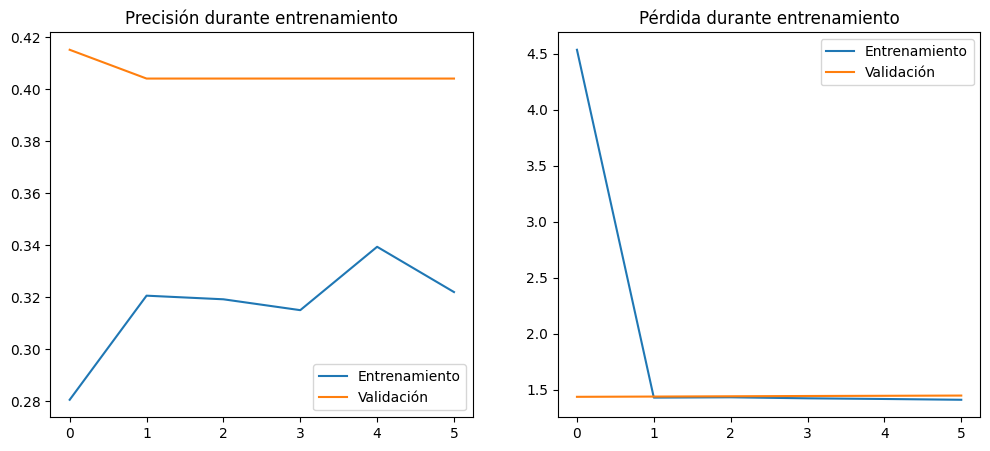

In [ ]:
# pip install tensorflow numpy matplotlib
tes_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing/"

tr_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Training/"
# Agregar imágenes nuevas al entrenamiento
extra_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Validation/"


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# 1. Configuración de rutas
ruta_entrenamiento = tr_images_dir
ruta_validacion = extra_images_dir
ruta_prueba = tes_images_dir

# 2. Verificación de rutas
for ruta in [ruta_entrenamiento, ruta_validacion, ruta_prueba]:
    if not os.path.exists(ruta):
        raise FileNotFoundError(f"¡La ruta {ruta} no existe! Verifica las rutas.")

# 3. Aumento de datos más agresivo
train_datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
   # zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# 4. Flujos de datos
train_gen = train_datagen.flow_from_directory(
    ruta_entrenamiento,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    ruta_validacion,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    ruta_prueba,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    shuffle=False
)

# 5. Definir si usaremos modelo modificado
print("\nUsando modelo Cambiando tasa de aprendizaje...")
usar_mobilenet = False  # Cambia a True si quieres probar MobileNetV2

if usar_mobilenet:
    print("\nUsando MobileNetV2 como base...")
    base_model = keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
    #base_model.trainable = False  # Congelamos pesos iniciales

    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')  # 4 clases
    ])
else:
    print("\nUsando modelo CNN personalizado...")
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.001), input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.001)),
        layers.MaxPooling2D((2, 2)),


        layers.Conv2D(128, (3, 3), padding='valid', activation='relu'),
        layers.MaxPooling2D((2, 2)),

        #layers.Flatten(),
        #layers.Dense(128,  padding='valid', activation='relu', kernel_regularizer=l2(0.001)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')

    ])




# 6. Compilación con learning rate más bajo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

# 7. Callbacks (EarlyStopping y ReduceLROnPlateau)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Ajuste dinámico de la tasa de aprendizaje si no mejora la precisión de validación
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,   # Reduce la tasa de aprendizaje en un 20%
    patience=5,   # Espera 5 épocas sin mejora
    min_lr=1e-7,  # Establece un límite inferior para la tasa de aprendizaje
    verbose=1
)

# 8. Entrenamiento del modelo con los callbacks
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    epochs=25,
    verbose=1,
    callbacks=[early_stop, lr_scheduler]  # Añadir ambos callbacks
)

# 9. Evaluación
print("\nEvaluando modelo...")
test_results = model.evaluate(test_gen)
print(f"\nPrecisión en prueba: {test_results[1]:.2%}")
print(f"Precisión: {test_results[2]:.2%} | Sensibilidad: {test_results[3]:.2%}")

# 10. Visualización de resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante entrenamiento')
plt.legend()


# Ruta donde se guardará el archivo en tu Google Drive
nombre='gRAFICA_MODELO6'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
plt.show()


## Modelo 9

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 3. Aumento de datos más agresivo
train_datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
   # zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)

# Definir el modelo CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(tr_gen.class_indices), activation='softmax')  # Número de clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(tr_gen,
                    validation_data=valid_gen,
                    epochs=20,
                    batch_size=batch_size)

# Evaluar en test
test_loss, test_acc = model.evaluate(ts_gen)
print(f"Test Accuracy: {test_acc:.4f}")


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.

Usando modelo Cambiando tasa de aprendizaje...

Usando modelo CNN personalizado...
Epoch 1/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.3237 - loss: 1.4245 - precision: 0.3318 - recall: 0.0101 - learning_rate: 1.0000e-04
Epoch 2/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.3839 - loss: 1.3157 - precision: 0.5039 - recall: 0.0309 - learning_rate: 1.0000e-04
Epoch 3/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.3994 - loss: 1.2861 - precision: 0.5327 - recall: 0.0516 - learning_rate: 1.0000e-04
Epoch 4/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.3976 - loss: 1.2808 - precision: 0.4321 - recall: 0.0455 - learning_rate: 1.0000e-04
Epoch 5/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 386s 1s/step - accuracy: 0.4361 - loss: 1.2369 - precision: 0.5238 - recall: 0.0979 - learning_rate: 1.0000e-04
Epoch 6/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.4406 -

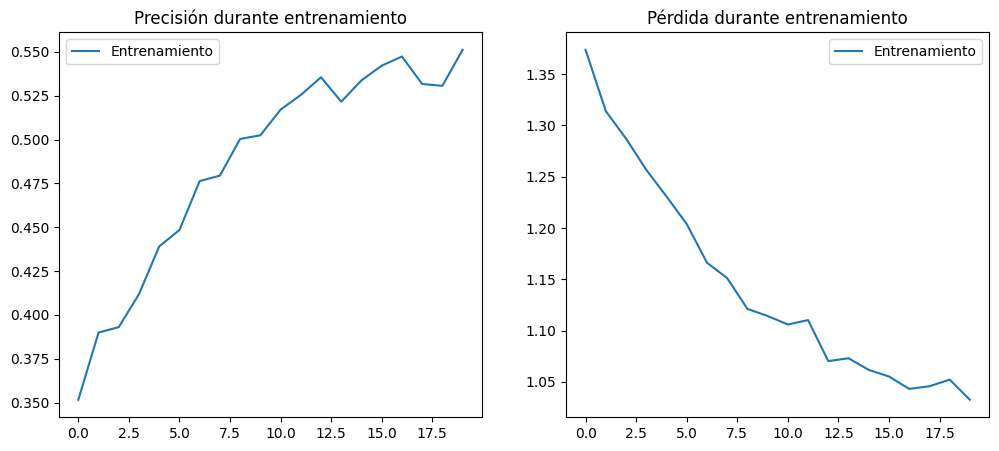

In [ ]:
#Quitamos las imagenes de validacion
# pip install tensorflow numpy matplotlib
tes_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing/"

tr_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Training/"
# Agregar imágenes nuevas al entrenamiento
extra_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Validation/"


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# 1. Configuración de rutas
ruta_entrenamiento = tr_images_dir
#ruta_validacion = extra_images_dir
ruta_prueba = tes_images_dir

# 2. Verificación de rutas
for ruta in [ruta_entrenamiento, ruta_prueba]:
    if not os.path.exists(ruta):
        raise FileNotFoundError(f"¡La ruta {ruta} no existe! Verifica las rutas.")

# 3. Aumento de datos más agresivo
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# 4. Flujos de datos
train_gen = train_datagen.flow_from_directory(
    ruta_entrenamiento,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    shuffle=True
)

#val_gen = val_test_datagen.flow_from_directory(
 #   ruta_validacion,
  #  target_size=(224, 224),
   # batch_size=10,
   # class_mode='categorical',
   # shuffle=False
#)

test_gen = val_test_datagen.flow_from_directory(
    ruta_prueba,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    shuffle=False
)

# 5. Definir si usaremos modelo modificado
print("\nUsando modelo Cambiando tasa de aprendizaje...")
usar_mobilenet = False  # Cambia a True si quieres probar MobileNetV2

if usar_mobilenet:
    print("\nUsando MobileNetV2 como base...")
    base_model = keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
    #base_model.trainable = False  # Congelamos pesos iniciales

    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')  # 4 clases
    ])
else:
    print("\nUsando modelo CNN personalizado...")
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.001), input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.001)),
        layers.MaxPooling2D((2, 2)),


        layers.Conv2D(128, (3, 3), padding='valid', activation='relu'),
        layers.MaxPooling2D((2, 2)),

        #layers.Flatten(),
        #layers.Dense(128,  padding='valid', activation='relu', kernel_regularizer=l2(0.001)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')

    ])




# 6. Compilación con learning rate más bajo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall')])

# 7. Callbacks (EarlyStopping y ReduceLROnPlateau)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Ajuste dinámico de la tasa de aprendizaje si no mejora la precisión de validación
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,   # Reduce la tasa de aprendizaje en un 20%
    patience=5,   # Espera 5 épocas sin mejora
    min_lr=1e-7,  # Establece un límite inferior para la tasa de aprendizaje
    verbose=1
)

# 8. Entrenamiento del modelo con los callbacks
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    #validation_data=val_gen,
    #validation_steps=len(val_gen),
    epochs=20,
    verbose=1,
    callbacks=[early_stop, lr_scheduler]  # Añadir ambos callbacks
)

# 9. Evaluación
print("\nEvaluando modelo...")
test_results = model.evaluate(test_gen)
print(f"\nPrecisión en prueba: {test_results[1]:.2%}")
print(f"Precisión: {test_results[2]:.2%} | Sensibilidad: {test_results[3]:.2%}")

# 10. Visualización de resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
#plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
#plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante entrenamiento')
plt.legend()


# Ruta donde se guardará el archivo en tu Google Drive
nombre='gRAFICA_MODELO6'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
plt.show()


## Modelo 10

In [ ]:
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Quitamos las imagenes de validacion
# pip install tensorflow numpy matplotlib
tes_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing/"

ruta_entrenamiento ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Training/"
# Agregar imágenes nuevas al entrenamiento
extra_images_dir ="/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Validation/"


# 1. Cargar datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_datagen.flow_from_directory(
    ruta_entrenamiento,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    shuffle=True
)

# 2. Obtener distribución de clases
class_counts = train_gen.classes
class_totals = dict(Counter(class_counts))

# 3. Calcular pesos inversos (clases minoritarias tienen mayor peso)
total_samples = sum(class_totals.values())
num_classes = len(class_totals)
class_weight = {cls: total_samples / (num_classes * count) for cls, count in class_totals.items()}

print(f"Pesos asignados a cada clase: {class_weight}")

# 4. Definir modelo
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(class_totals), activation='softmax')
])

# 5. Compilar modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

# 6. Callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# 7. Entrenar modelo con balanceo de clases
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=20,
    verbose=1,
    callbacks=[early_stop, lr_scheduler],
    class_weight=class_weight  # <-- Balanceo de clases
)

# 9. Evaluación
print("\nEvaluando modelo...")
test_results = model.evaluate(test_gen)
print(f"\nPrecisión en prueba: {test_results[1]:.2%}")
print(f"Precisión: {test_results[2]:.2%} | Sensibilidad: {test_results[3]:.2%}")

# 10. Visualización de resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
#plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
#plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante entrenamiento')
plt.legend()



# Ruta donde se guardará el archivo en tu Google Drive
nombre='gRAFICA_MODELO7'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
plt.show()

Found 2870 images belonging to 4 classes.
Pesos asignados a cada clase: {np.int32(0): 0.8686440677966102, np.int32(1): 0.8728710462287105, np.int32(2): 1.8164556962025316, np.int32(3): 0.8675937122128174}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 766s 3s/step - accuracy: 0.2613 - loss: 1.4421 - precision: 0.2684 - recall: 0.0190 - learning_rate: 1.0000e-04
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,precision,recall
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,precision,recall,learning_rate.
  callback.on_epoch_end(epoch, logs)


287/287 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.3662 - loss: 1.2803 - precision: 0.4918 - recall: 0.0430 - learning_rate: 1.0000e-04
Epoch 3/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.3963 - loss: 1.2278 - precision: 0.5223 - recall: 0.0680 - learning_rate: 1.0000e-04
Epoch 4/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.4450 - loss: 1.1887 - precision: 0.5099 - recall: 0.1024 - learning_rate: 1.0000e-04
Epoch 5/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.4602 - loss: 1.1604 - precision: 0.5895 - recall: 0.1259 - learning_rate: 1.0000e-04
Epoch 6/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.4656 - loss: 1.1531 - precision: 0.5538 - recall: 0.1271 - learning_rate: 1.0000e-04
Epoch 7/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.5114 - loss: 1.0657 - precision: 0.6343 - recall: 0.2045 - learning_rate: 1.0000e-04
Epoch 8/20
287/287 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.4609 - loss: 1.0885 - precision:

NameError: name 'test_gen' is not defined

accuracy: Es el porcentaje de predicciones correctas sobre el total de predicciones, con clases balanceadas, La precisión debería ser superior al 70%.

loss: dif ëntre las predicciones del modelo y las etiquetas reales. a pérdida debería disminuir con el tiempo. si aumentan estos valors, hay sobre ajuste.

presición: exactitud de las predicciones positivas del modelo. 70%

Recall (Sensibilidad): todas las instancias verdaderas de una clase, ¿cuántas fueron detectadas? Aprox. 70%, un bajo recall, no clasifica bien.

F1-Score (Combinación de precisión y recall): cuando hay desbalance,  0.7 o superior.


AUC-ROC (Area Under the Curve - Receiver Operating Characteristic): Distinción entre clases. >70% ok UC cercano a 0.5 indica que el modelo está clasificando casi al azar.



# MODELO 2 CAMBIO: IMAGEN

In [ ]:
tr_df


Class Path                 Class  \
0     /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  tumor_meduloblastoma   
1     /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  tumor_meduloblastoma   
2     /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  tumor_meduloblastoma   
3     /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  tumor_meduloblastoma   
4     /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  tumor_meduloblastoma   
...                                                 ...                   ...   
2865  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...          tumor_glioma   
2866  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...          tumor_glioma   
2867  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...          tumor_glioma   
2868  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...          tumor_glioma   
2869  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...          tumor_glioma   

     Path crop  
0         None  
1         None  
2         None  
3         None  
4         None  
...        ...  
2865            
2866            
2867            
2868            
2869            

[2870 rows x 3 columns]

In [ ]:
#tv_df = train_df('/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Validation')
#ts_df = test_df('/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Testing')
#tr_df = test_df('/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/DATA_SET/Traininig')


valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

batch_size = 32
img_size = (299, 299)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)


_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = train_datagen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = train_datagen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = train_datagen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Definir el modelo CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(tr_gen.class_indices), activation='softmax')  # Número de clases
])


# 5. Compilar modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(tr_gen,
                    validation_data=valid_gen,
                    epochs=20,
                    batch_size=batch_size)

# Evaluar en test
test_loss, test_acc = model.evaluate(ts_gen)
print(f"Test Accuracy: {test_acc:.4f}")


Found 2870 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1247s 14s/step - accuracy: 0.2857 - loss: 1.6597 - val_accuracy: 0.3249 - val_loss: 1.4640
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 647s 7s/step - accuracy: 0.3750 - loss: 1.2827 - val_accuracy: 0.2284 - val_loss: 1.4644
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 644s 7s/step - accuracy: 0.4151 - loss: 1.2214 - val_accuracy: 0.2386 - val_loss: 1.6084
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 646s 7s/step - accuracy: 0.4268 - loss: 1.2185 - val_accuracy: 0.2792 - val_loss: 1.9497
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 647s 7s/step - accuracy: 0.4347 - loss: 1.1915 - val_accuracy: 0.2995 - val_loss: 1.7979
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 640s 7s/step - accuracy: 0.4760 - loss: 1.1477 - val_accuracy: 0.2843 - val_loss: 1.6338
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 633s 7s/step - ac

In [ ]:

#valid_df, ts_df = train_test_split(tr_df, train_size=0.9, random_state=20, stratify=tr_df['Class'])

batch_size = 32
img_size = (299, 299)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)


_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = train_datagen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = train_datagen.flow_from_dataframe(tb_dr, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size, shuffle=False)



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Definir el modelo CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(tr_gen.class_indices), activation='softmax')  # Número de clases
])



# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(tr_gen,
                    validation_data=valid_gen,
                    epochs=10,
                    batch_size=batch_size)

# Evaluar en test
test_loss, test_acc = model.evaluate(ts_gen)
print(f"Test Accuracy: {test_acc:.4f}")


Found 2870 validated image filenames belonging to 4 classes.
Found 2583 validated image filenames belonging to 4 classes.
Found 287 validated image filenames belonging to 4 classes.
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 717s 8s/step - accuracy: 0.2970 - loss: 1.5035 - val_accuracy: 0.4011 - val_loss: 1.3139
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 710s 8s/step - accuracy: 0.3832 - loss: 1.3062 - val_accuracy: 0.4108 - val_loss: 1.2570
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 700s 8s/step - accuracy: 0.3887 - loss: 1.2729 - val_accuracy: 0.4177 - val_loss: 1.2398
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 711s 8s/step - accuracy: 0.4111 - loss: 1.2600 - val_accuracy: 0.4510 - val_loss: 1.2368
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 708s 8s/step - accuracy: 0.4190 - loss: 1.2300 - val_accuracy: 0.4944 - val_loss: 1.1729
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 720s 8s/step - accuracy: 0.4569 - loss: 1.1945 - val_accuracy: 0.4909 - val_loss: 1.1475
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 715s 8s/step - acc

## vtop

In [ ]:
valid_df, ts_df2 = train_test_split(tr_df, train_size=0.9, random_state=20, stratify=tr_df['Class'])

batch_size = 32
img_size = (299, 299)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    #zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)


_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = ts_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = train_datagen.flow_from_dataframe(tv_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size, shuffle=False)



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Definir el modelo CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(tr_gen.class_indices), activation='softmax')  # Número de clases
])



# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(tr_gen,
                    validation_data=valid_gen,
                    epochs=20,
                    batch_size=batch_size)

# Evaluar en test
test_loss, test_acc = model.evaluate(ts_gen)
print(f"Test Accuracy: {test_acc:.4f}")



Found 2870 validated image filenames belonging to 4 classes.
Found 2618 validated image filenames belonging to 4 classes.
Found 394 validated image filenames belonging to 4 classes.
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1137s 13s/step - accuracy: 0.4053 - loss: 1.2683 - val_accuracy: 0.1841 - val_loss: 1.6707
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 455s 5s/step - accuracy: 0.5899 - loss: 1.0019 - val_accuracy: 0.3014 - val_loss: 1.5561
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 453s 5s/step - accuracy: 0.6509 - loss: 0.8739 - val_accuracy: 0.2636 - val_loss: 1.7103
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 455s 5s/step - accuracy: 0.7012 - loss: 0.7836 - val_accuracy: 0.2865 - val_loss: 1.8194
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 523s 6s/step - accuracy: 0.7601 - loss: 0.6770 - val_accuracy: 0.3159 - val_loss: 1.8000
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 466s 5s/step - accuracy: 0.7798 - loss: 0.6226 - val_accuracy: 0.3476 - val_loss: 1.7603
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 459s 5s/step - a

NameError: name 'history_v2' is not defined

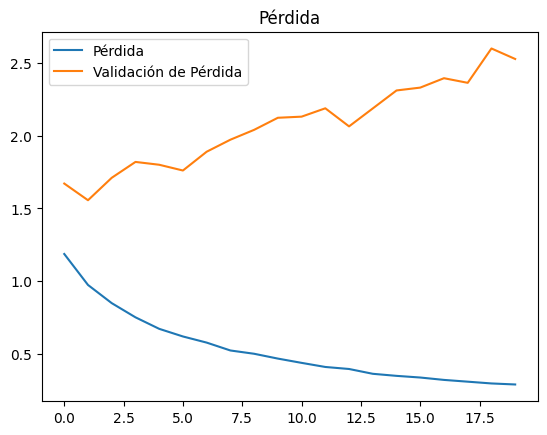

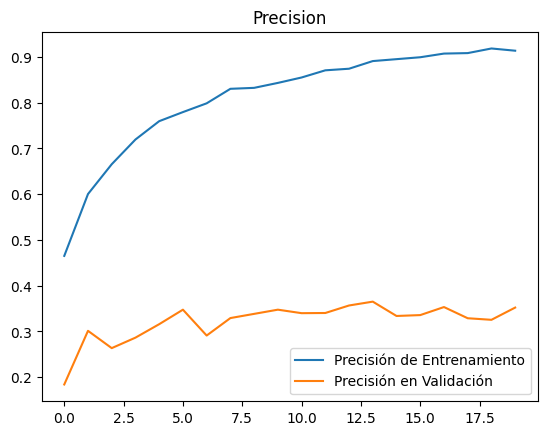

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 804ms/step


ValueError: Asked to retrieve element 13, but the Sequence has length 13

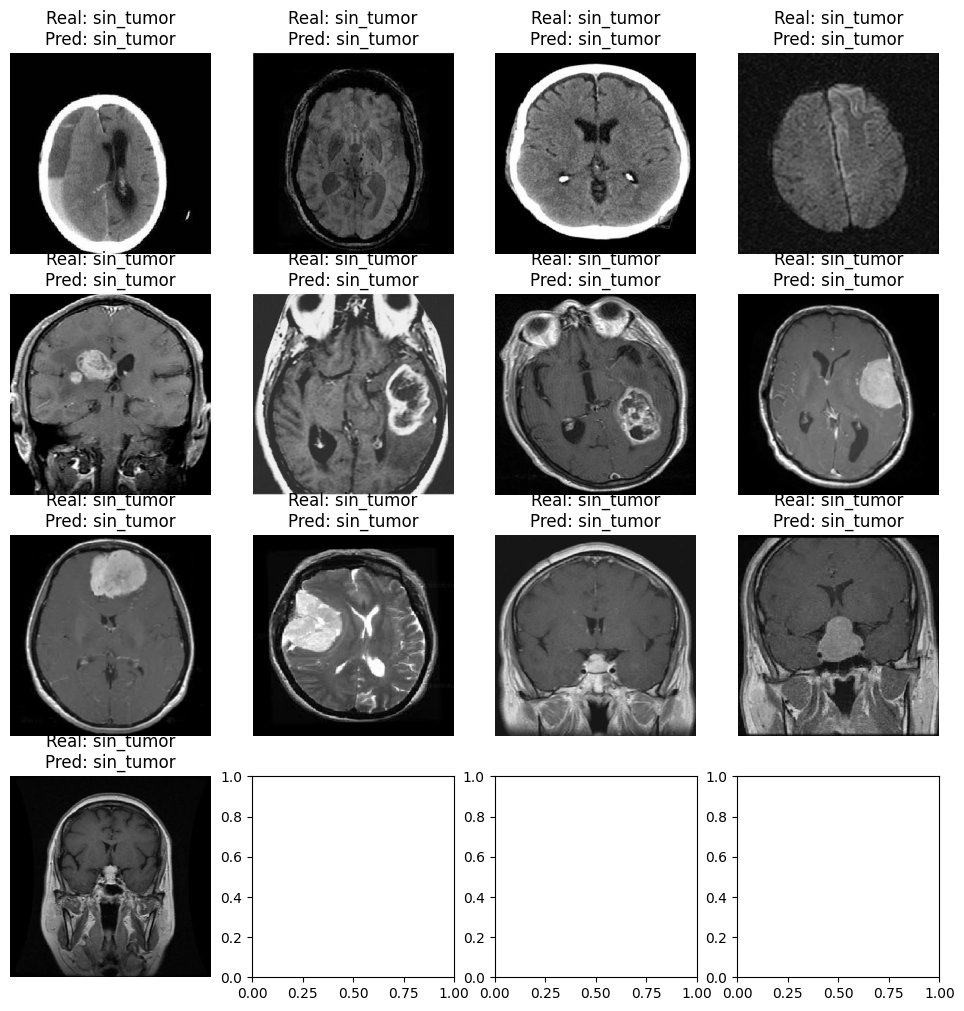

In [ ]:
nombre='Modelo_crop'
plot_metrics(history.history, nombre)

#ener predicciones del modelo
preds = model.predict(ts_gen)
pred_classes = np.argmax(preds, axis=1)  # Convertir a clases

# Obtener los nombres de las clases reales y predichas
true_classes = ts_gen.classes
class_labels = list(ts_gen.class_indices.keys())

# Mostrar algunas predicciones
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Grid de imágenes
for i, ax in enumerate(axes.flat):
    img, true_label = ts_gen[i][0][0], true_classes[i]  # Imagen y etiqueta real
    pred_label = pred_classes[i]  # Etiqueta predicha

    ax.imshow(img)
    ax.set_title(f"Real: {class_labels[true_label]}\nPred: {class_labels[pred_label]}")
    ax.axis("off")

plt.tight_layout()
# Ruta donde se guardará el archivo en tu Google Drive

ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np

# Obtener predicciones del modelo
preds = model.predict(ts_gen)
pred_classes = np.argmax(preds, axis=1)  # Convertir a clases

# Obtener los nombres de las clases reales y predichas
true_classes = ts_gen.classes
class_labels = list(ts_gen.class_indices.keys())

# Mostrar algunas predicciones
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Grid de imágenes
for i, ax in enumerate(axes.flat):
    img, true_label = ts_gen[i][0][0], true_classes[i]  # Imagen y etiqueta real
    pred_label = pred_classes[i]  # Etiqueta predicha

    ax.imshow(img)
    ax.set_title(f"Real: {class_labels[true_label]}\nPred: {class_labels[pred_label]}")
    ax.axis("off")

plt.tight_layout()
# Ruta donde se guardará el archivo en tu Google Drive
nombre='Modelo_crop'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
plt.show()

#Modelo 3.0

In [ ]:
nombre='Modelo_salva'


valid_df, ts_df = train_test_split(tr_df, train_size=0.9, random_state=20, stratify=tr_df['Class'])

batch_size = 32
img_size = (299, 299)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    #zoom_range=0.3,
    brightness_range=[0.6, 1.4],
    horizontal_flip=True,
    fill_mode='nearest'
)


_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = train_datagen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size, shuffle=False)



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Definir el modelo CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(299, 299, 3)),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(tr_gen.class_indices), activation='softmax')  # Número de clases
])



# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(tr_gen,
                    validation_data=valid_gen,
                    epochs=20,
                    batch_size=batch_size)

# Evaluar en test
test_loss, test_acc = model.evaluate(ts_gen)
print(f"Test Accuracy: {test_acc:.4f}")


plot_metrics(history.history, nombre)

#ener predicciones del modelo
preds = model.predict(ts_gen)
pred_classes = np.argmax(preds, axis=1)  # Convertir a clases

# Obtener los nombres de las clases reales y predichas
true_classes = ts_gen.classes
class_labels = list(ts_gen.class_indices.keys())

# Mostrar algunas predicciones
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Grid de imágenes
for i, ax in enumerate(axes.flat):
    img, true_label = ts_gen[i][0][0], true_classes[i]  # Imagen y etiqueta real
    pred_label = pred_classes[i]  # Etiqueta predicha

    ax.imshow(img)
    ax.set_title(f"Real: {class_labels[true_label]}\nPred: {class_labels[pred_label]}")
    ax.axis("off")

plt.tight_layout()
# Ruta donde se guardará el archivo en tu Google Drive

ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')
plt.show()


# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="gray", xticklabels=ts_gen.class_indices.keys(), yticklabels=ts_gen.class_indices.keys())
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
# Ruta donde se guardará el archivo en tu Google Drive
nombre='matriz_confusion_modelo1'
ruta_guardado = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/PROYECTO FINAL/"+nombre+'.png'

# Guardar el plot
plt.savefig(ruta_guardado, dpi=300, bbox_inches='tight')

plt.show()


Found 2870 validated image filenames belonging to 4 classes.
Found 2583 validated image filenames belonging to 4 classes.
Found 287 validated image filenames belonging to 4 classes.
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 476s 5s/step - accuracy: 0.4445 - loss: 1.2371 - val_accuracy: 0.3024 - val_loss: 1.4689
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 464s 5s/step - accuracy: 0.5741 - loss: 0.9964 - val_accuracy: 0.2683 - val_loss: 1.5116
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 461s 5s/step - accuracy: 0.6652 - loss: 0.8407 - val_accuracy: 0.2605 - val_loss: 1.5741
Epoch 4/20
